In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
df = pd.read_pickle('./news_processed.pickle')

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from nltk.corpus import stopwords

In [5]:
stopwords = stopwords.words('english')

In [6]:
stopwords.append('breitbart')


In [8]:
vec = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2), max_features = 6000)
cv = vec.fit_transform(df['normalized_title'])

In [92]:
model = LatentDirichletAllocation(n_components = 60 ,learning_method='online')
model.fit(cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=60, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [93]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

n_top_words = 20

print("\nTopics в модели LDA: ")

# Получаем топики
tf_feature_names = vec.get_feature_names()
print_top_words(model, tf_feature_names, n_top_words)


Topics в модели LDA: 

Topic #0: game poll men paul paul ryan nominee already surge deep summer short brand half warns wave majority stage mock news daily lack

Topic #1: ban meet man gun child judge street strike ask free kid ex let part blame crime gay major check activist

Topic #2: know need talk thing late college public night book christian super mike employee bowl weekend hero trust super bowl professor enemy

Topic #3: go obamacare long global month visit stay trial economy lawyer winner trouble delay gain ground wait settle always drama scott

Topic #4: report news help claim wall dy put iran bank little continue missile fox news firm chinese chicago yet spy epa board

Topic #5: victim bomb cost search concern intel evidence remember criminal say trump attempt say chair oppose safety listen tear witness memo count

Topic #6: conservative sen robert san corruption attacker zuckerberg crackdown anger jr emerge estate adult francisco pitch san francisco mark zuckerberg dismiss p

In [326]:
df[df['n_topic'] == 47].sort_values('topic_proba', ascending = False).head(20)

title       date  \
109771  The U.S. And Cuba: A Brief History Of A Compli... 2014-12-17   
39884        History moment awaits Palestine at Asian Cup 2015-01-11   
39902                Cuba releases 53 political prisoners 2015-01-12   
113989  How Columbus Sailed Into U.S. History, Thanks ... 2013-10-14   
40695   Serena back at Indian Wells after it ’disgrace... 2015-03-13   
41401                     History of marijuana in America 2013-08-15   
41341   Is marijuana as safe as -- or safer than -- al... 2014-01-20   
40181             Better safe than sorry or #Snowperbole? 2015-01-27   
56076                   A Brief History of ‘Spooktacular’ 2016-10-28   
75418                        America: History’s Exception 2016-06-09   
82039   Zack Wheeler deserves this moment — before it’... 2017-03-30   
61403                                One final thought on 2004-11-18   
52572                                Sailing Back to Cuba 2016-04-22   
136791                     Awaiting a political awakening 2016-03-19   
42104                     No, America shouldn’t go metric 2015-06-05   
37643              America’s Cup: Swedes on top in Toulon 2016-09-11   
37666      Ryder Cup 2016: Rickie Fowler wins US wildcard 2016-09-12   
40500   FIFA’s 2021 Confederations Cup won’t be held i... 2015-02-27   
109167  50 Years On, ’Mockingbird’ Still Sings America... 2010-07-07   
114480  Diwali Dilemma: My Complicated Relationship Wi... 2016-10-28   

                publication                                 normalized_title  \
109771                  NPR   u s cuba brief history complicate relationship   
39884                   CNN         history moment await palestine asian cup   
39902                   CNN                  cuba release political prisoner   
113989                  NPR         columbus sail u s history thanks italian   
40695                   CNN         serena back indian well disgrace america   
41401                   CNN                        history marijuana america   
41341                   CNN                be marijuana as safe safe alcohol   
40181                   CNN                      well safe sorry snowperbole   
56076              Atlantic                       brief history spooktacular   
75418       National Review                      america history s exception   
82039         New York Post                 zack wheeler deserve moment s go   
61403   Talking Points Memo                                    final thought   
52572              Atlantic                                   sail back cuba   
136791      Washington Post                        await political awakening   
42104                   CNN                      america shouldn t go metric   
37643                   CNN                   america s cup swede top toulon   
37666                   CNN             ryder cup rickie fowler win wildcard   
40500                   CNN     fifa s confederation cup win t be hold qatar   
109167                  NPR       year mockingbird still sing america s song   
114480                  NPR  diwali dilemma complicate relationship swastika   

        n_topic  topic_proba      wider_topic  
109771       47     0.694927  domestic issues  
39884        47     0.694389  domestic issues  
39902        47     0.670970  domestic issues  
113989       47     0.669920  domestic issues  
40695        47     0.668350  domestic issues  
41401        47     0.637292  domestic issues  
41341        47     0.630688  domestic issues  
40181        47     0.592532  domestic issues  
56076        47     0.592368  domestic issues  
75418        47     0.591890  domestic issues  
82039        47     0.591576  domestic issues  
61403        47     0.591230  domestic issues  
52572        47     0.590611  domestic issues  
136791       47     0.588777  domestic issues  
42104        47     0.588303  domestic issues  
37643        47     0.588266  domestic issues  
37666        47     0.586378  domestic iss

In [328]:
df['n_topic'][df['wider_topic'] == 'foreign'].value_counts()

33    4703
4     2453
56    2422
45    1863
36    1732
29    1706
9     1018
Name: n_topic, dtype: int64

In [309]:
df

title       date  \
105029  How Nirvana’s ’Smells Like Teen Spirit’ Became... 2000-05-15   
62169          Everything changes. Everything. Especially 2003-06-14   
108303  David Bowie On The Ziggy Stardust Years: ’We W... 2003-09-19   
57718                  Nancy Reagan’s Alzheimer’s Crusade 2004-06-06   
61403                                One final thought on 2004-11-18   
...                                                   ...        ...   
101207  The view from Middletown: For Bernie Sanders s...        NaT   
101950  Progress Personified: NYC subway hero takes hi...        NaT   
102369  Enter the Defining Moment contest for a chance...        NaT   
102987  The view from Middletown: join Gary Younge for...        NaT   
103448        The secret to happiness is all in your head        NaT   

                publication  \
105029                  NPR   
62169   Talking Points Memo   
108303                  NPR   
57718              Fox News   
61403   Talking Points Memo   
...                     ...   
101207             Guardian   
101950             Guardian   
102369             Guardian   
102987             Guardian   
103448             Guardian   

                                         normalized_title  n_topic  \
105029          nirvana s smell teen spirit become anthem       11   
62169             everything change everything especially        8   
108303  david bowie ziggy stardust year be create st c...       53   
57718                  nancy reagan s alzheimer s crusade       25   
61403                                       final thought       47   
...                                                   ...      ...   
101207  view middletown bernie sander supporters vote ...       44   
101950  progress personify nyc subway hero take good d...       26   
102369  enter define moment contest chance be feature ...       56   
102987  view middletown join gary younge unique look e...       50   
103448                           secret happiness be head       22   

        topic_proba            wider_topic  
105029     0.670116   immigration&protests  
62169      0.508333        domestic issues  
108303     0.682318        electoral&party  
57718      0.642567        policy&politics  
61403      0.591230        domestic issues  
...             ...                    ...  
101207     0.198284        policy&politics  
101950     0.140983  sexual_assault&police  
102369     0.115454                foreign  
102987     0.166541  sexual_assault&police  
103448     0.300956        domestic issues  

[142568 rows x 7 columns]

Топик # 0


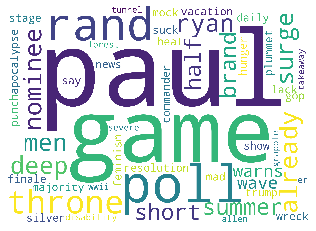

Топик # 1


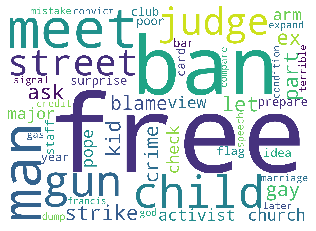

Топик # 2


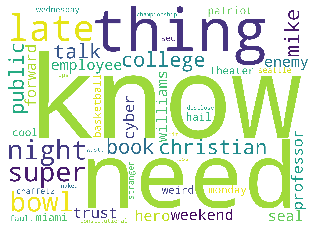

Топик # 3


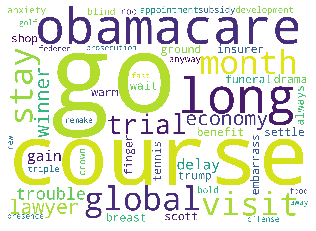

Топик # 4


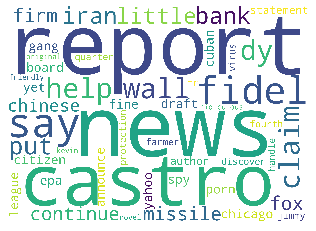

Топик # 5


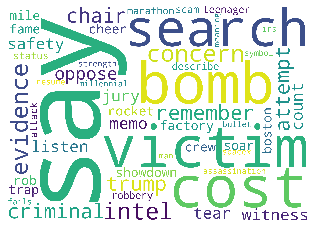

Топик # 6


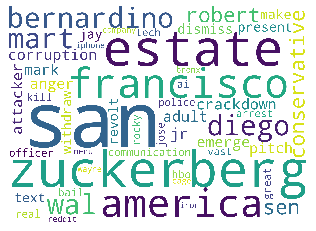

Топик # 7


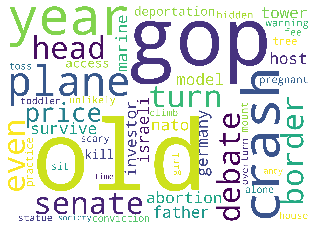

Топик # 8


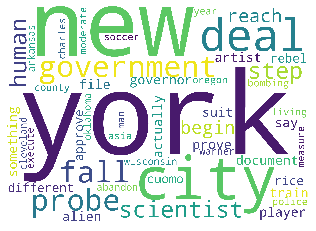

Топик # 9


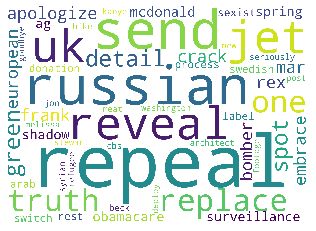

Топик # 10


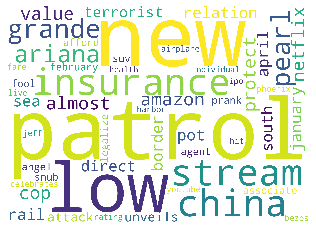

Топик # 11


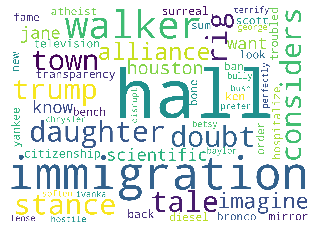

Топик # 12


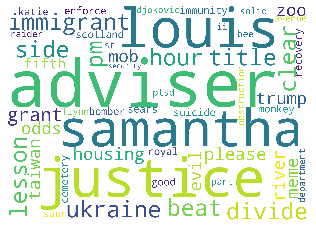

Топик # 13


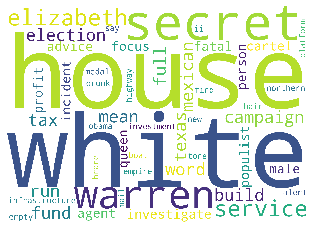

Топик # 14


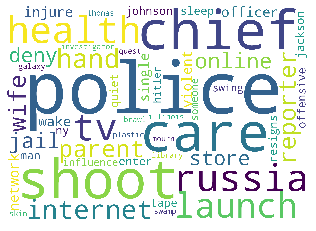

Топик # 15


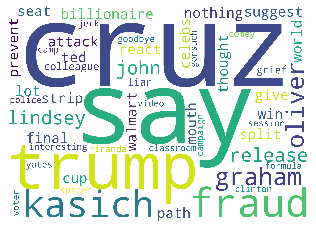

Топик # 16


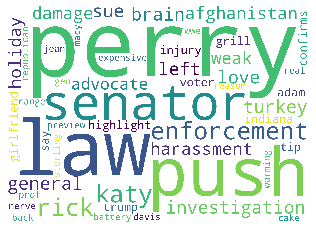

Топик # 17


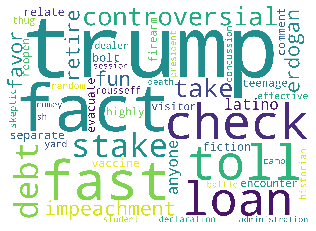

Топик # 18


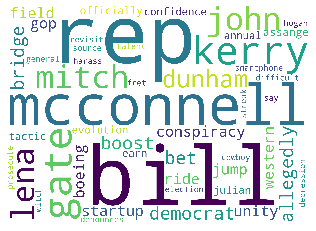

Топик # 19


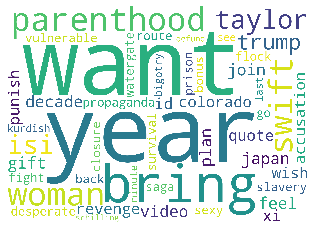

Топик # 20


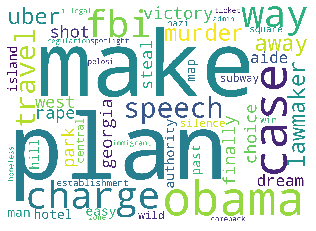

Топик # 21


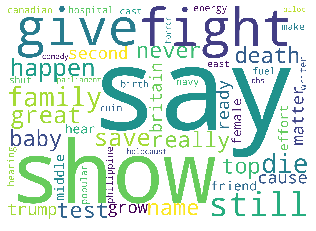

Топик # 22


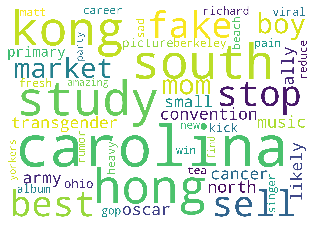

Топик # 23


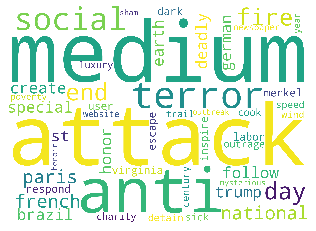

Топик # 24


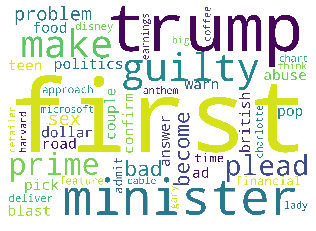

Топик # 25


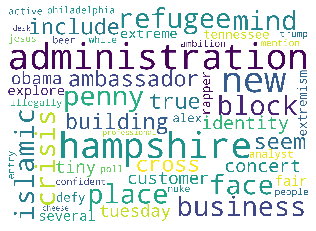

Топик # 26


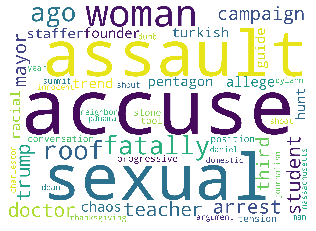

Топик # 27


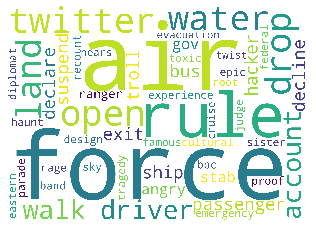

Топик # 28


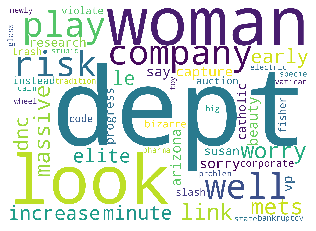

Топик # 29


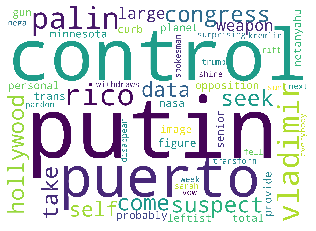

Топик # 30


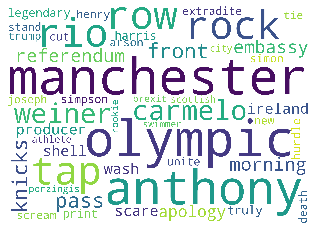

Топик # 31


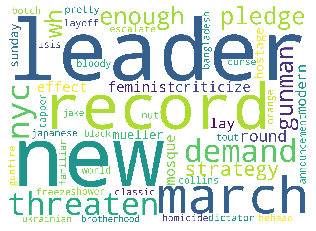

Топик # 32


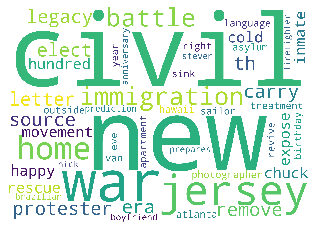

Топик # 33


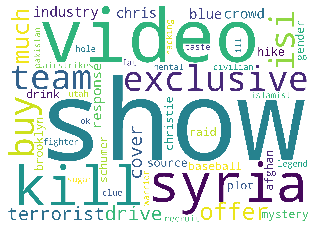

Топик # 34


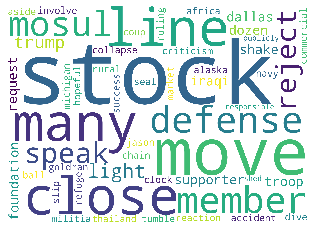

Топик # 35


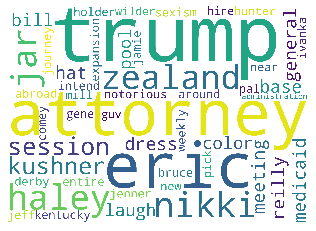

Топик # 36


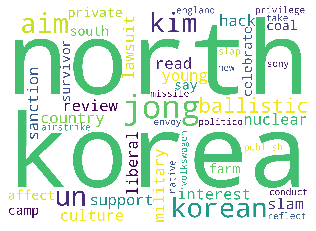

Топик # 37


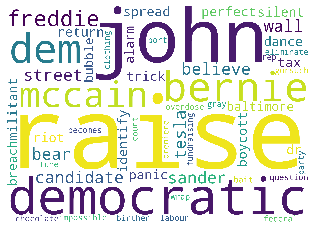

Топик # 38


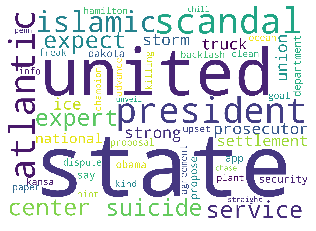

Топик # 39


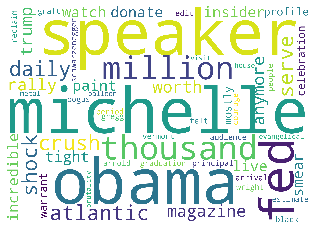

Топик # 40


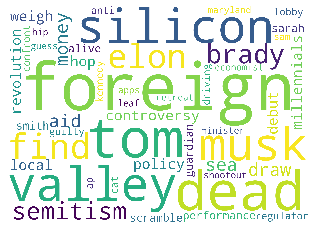

Топик # 41


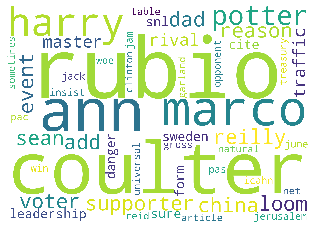

Топик # 42


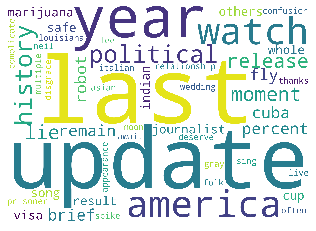

Топик # 43


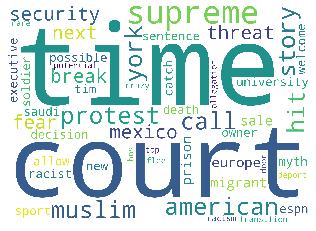

Топик # 44


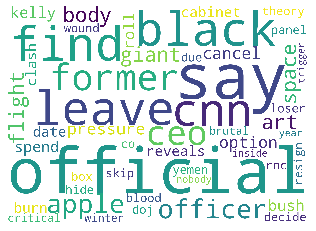

Топик # 45


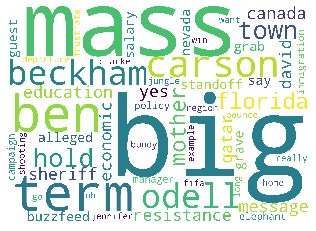

Топик # 46


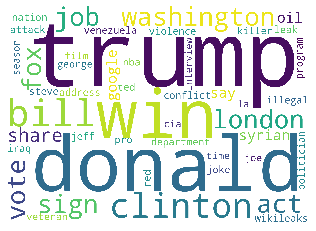

Топик # 47


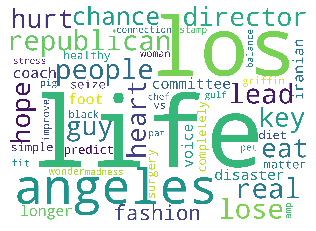

Топик # 48


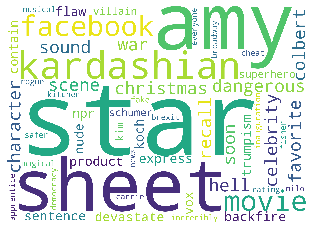

Топик # 49


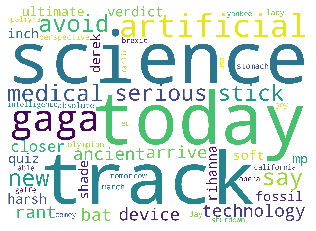

Топик # 50


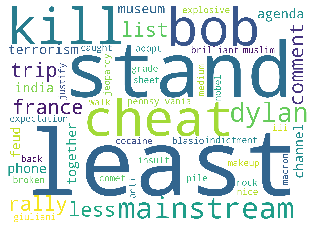

Топик # 51


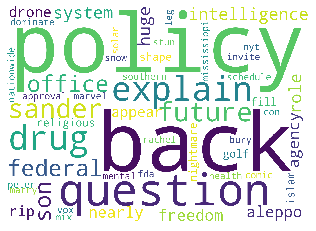

Топик # 52


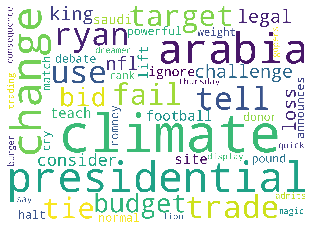

Топик # 53


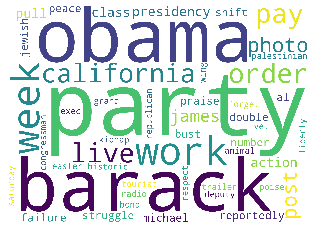

Топик # 54


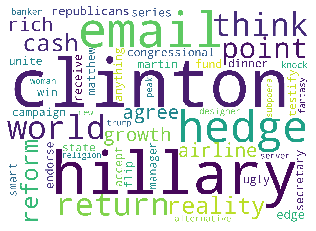

Топик # 55


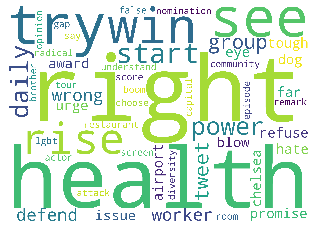

Топик # 56


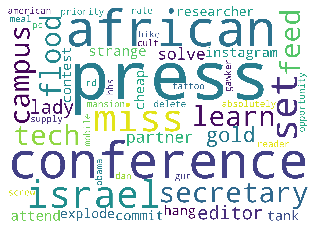

Топик # 57


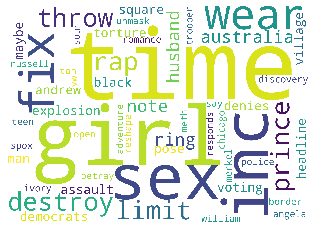

Топик # 58


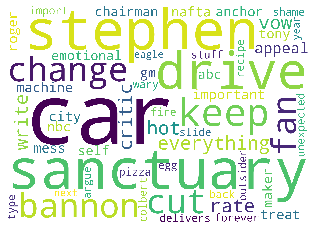

Топик # 59


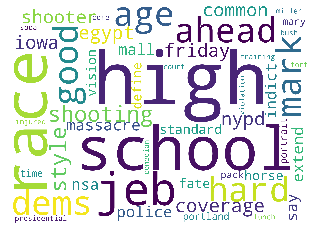

In [94]:
topics_v = []

for i in range(60):
    topics_v.append(model.components_[i])

topics_v_named = []
for j in range(60):
    topics_v_named.append([tf_feature_names[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(60):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [52]:
df['n_topic'] = np.argmax(model.transform(cv),axis =1)
df['topic_proba'] = np.max(model.transform(cv),axis =1)
df['normalized_title'].str.contains('breitbart').sample(1)

22101    True
Name: normalized_title, dtype: bool

In [471]:
df['publication'].value_counts()

Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10709
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5213
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [262]:
foreign = [29,56,36,33,14,9,45,4]
electoral_party = [54,53,46,14,37,39,42]
immigration_protests= [12,11,32,43]
domestic_agenda = [8,10,15,19,22,27,34,41,47]
policy_issues =[3,6,7,13,16,17,18,31,51,52,20,25,28,35,38,24,44,55]
sexual_assault_attacks_police= [59,57,50,26,14,5,1,23]


In [263]:
df['wider_topic'] = ''
df['wider_topic'][df['n_topic'].isin(foreign)] = 'foreign'

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [269]:
df['wider_topic'][df['n_topic'].isin(electoral_party)] = 'electoral&party'
df['wider_topic'][df['n_topic'].isin(immigration_protests)] = 'immigration&protests'
df['wider_topic'][df['n_topic'].isin(policy_issues)] = 'policy&politics'
df['wider_topic'][df['n_topic'].isin(sexual_assault_attacks_police)] = 'sexual_assault&police'
df['wider_topic'][df['n_topic'].isin(domestic_agenda)] = 'domestic issues'

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel 

In [270]:
df['wider_topic'] = df['wider_topic'].replace('','other')

In [271]:
df['n_topic'][df['wider_topic'] == 'other'].value_counts()

21    4698
0     3375
58    2674
40    2101
48    1868
49    1851
2     1759
30    1708
Name: n_topic, dtype: int64

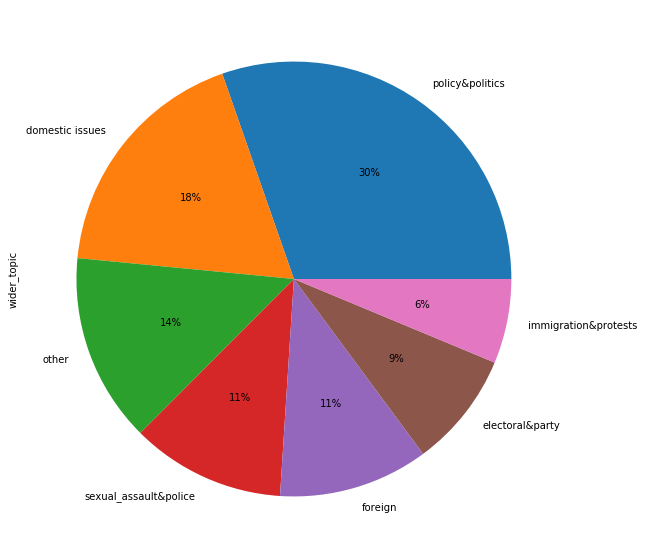

In [274]:
df['wider_topic'].value_counts().plot.pie(figsize = (10,10),autopct='%1.0f%%')
plt.savefig('Anewspie.png')

In [480]:
time_series2 = pd.get_dummies(df['wider_topic']).set_index(df['date']).resample('D').sum()
time2 = time_series2[time_series.index > '2016-01-01']

In [481]:
time_series2

domestic issues  electoral&party  foreign  immigration&protests  \
date                                                                          
2000-05-15                0                0        0                     1   
2000-05-16                0                0        0                     0   
2000-05-17                0                0        0                     0   
2000-05-18                0                0        0                     0   
2000-05-19                0                0        0                     0   
...                     ...              ...      ...                   ...   
2017-07-02                4                1        3                     1   
2017-07-03                6                5        4                     5   
2017-07-04                7                3        7                     4   
2017-07-05                5                4        0                     0   
2017-07-06                5                2        2                     1   

            other  policy&politics  sexual_assault&police  
date                                                       
2000-05-15      0                0                      0  
2000-05-16      0                0                      0  
2000-05-17      0                0                      0  
2000-05-18      0                0                      0  
2000-05-19      0                0                      0  
...           ...              ...                    ...  
2017-07-02      1                7                      3  
2017-07-03      9               19                      8  
2017-07-04      9                4                      5  
2017-07-05      7                7                      1  
2017-07-06      6                3                      1  

[6262 rows x 7 columns]

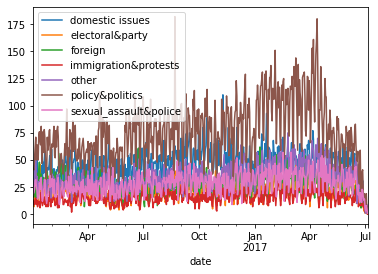

# LDA on LDA

In [488]:
themes = [50, 33, 23, 5]
terr_df = df[df['n_topic'].isin(themes)]

In [492]:
terr_df  = terr_df.reset_index()

In [497]:
terr_df

index                                              title       date  \
0      109864                     A Timeline Of Radovan Karadzic 2008-07-22   
1       75889                Back to the Future with Peter Thiel 2011-01-20   
2      109501  Dining After ’Downton Abbey’: Why British Food... 2012-02-19   
3       34009                     Mahmoud Ahmadinejad Fast Facts 2012-12-10   
4       34655                          Nelson Mandela Fast Facts 2012-12-11   
...       ...                                                ...        ...   
10453   64028  The Conflict Tearing Apart British\nPolitics: ...        NaT   
10454   64042  What The Supreme Court Could Decide When It Co...        NaT   
10455   95338  Reshma Saujani: the entrepreneur kickstarting ...        NaT   
10456  100194  Rough trade: the global economy needs a jumpst...        NaT   
10457  102987  The view from Middletown: join Gary Younge for...        NaT   

               publication                                   normalized_title  \
0                      NPR                          timeline radovan karadzic   
1          National Review                            back future peter thiel   
2                      NPR   din downton abbey british food be so bad so long   
3                      CNN                      mahmoud ahmadinejad fast fact   
4                      CNN                           nelson mandela fast fact   
...                    ...                                                ...   
10453  Talking Points Memo  conflict tear apart british politics interview...   
10454  Talking Points Memo       supreme court decide come trump s travel ban   
10455             Guardian  reshma saujani entrepreneur kickstarting girl ...   
10456             Guardian  rough trade global economy need jumpstart benefit   
10457             Guardian  view middletown join gary younge unique look e...   

       n_topic  topic_proba            wider_topic    year  
0           23     0.508333  sexual_assault&police  2008.0  
1           23     0.670855  sexual_assault&police  2011.0  
2           50     0.506979  sexual_assault&police  2012.0  
3           33     0.233273                foreign  2012.0  
4           33     0.233273                foreign  2012.0  
...        ...          ...                    ...     ...  
10453       50     0.193962  sexual_assault&police     NaN  
10454       33     0.275296                foreign     NaN  
10455       33     0.212988                foreign     NaN  
10456       50     0.153051  sexual_assault&police     NaN  
10457       50     0.166541  sexual_assault&police     NaN  

[10458 rows x 9 columns]

In [494]:
stopwords.append('breitbart')

In [507]:
vec2 = TfidfVectorizer(stop_words= stopwords,ngram_range=(1,2))
terr_cv = vec2.fit_transform(terr_df['normalized_title'])

In [519]:
terr_model = LatentDirichletAllocation(n_components= 15)
terr_model.fit(terr_cv)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [513]:
tf_feature_names2 = vec2.get_feature_names()

In [518]:
tf_feature_names2

['aa',
 'aa ball',
 'aaron',
 'aaron klein',
 'aaron pryor',
 'aaron rodgers',
 'ab',
 'ab inbev',
 'aba',
 'aba president',
 'abandon',
 'abandon cult',
 'abandon hershey',
 'abandon hillary',
 'abandon plan',
 'abandon planned',
 'abandon traditional',
 'abandon voice',
 'abate',
 'abattoir',
 'abbas',
 'abbas accuse',
 'abbas fatah',
 'abbas senior',
 'abbey',
 'abbey british',
 'abbey creator',
 'abbott',
 'abbott arm',
 'abbott joke',
 'abby',
 'abby cadabby',
 'abc',
 'abc news',
 'abc photographer',
 'abdel',
 'abdel fattah',
 'abdeslam',
 'abdeslam back',
 'abdicate',
 'abdicate country',
 'abduct',
 'abduct boko',
 'abducted',
 'abducted jogger',
 'abduction',
 'abduction boko',
 'abduction case',
 'abdul',
 'abdul jabbar',
 'abdullah',
 'abdullah queen',
 'abdus',
 'abdus salaam',
 'abe',
 'abe eye',
 'abe hit',
 'abe meet',
 'abe really',
 'abe share',
 'abedin',
 'abedin connect',
 'abedin inner',
 'abenomics',
 'abenomics doubt',
 'aberdeenshire',
 'aberdeenshire golf',
 '

In [515]:
terr_model.n_components

5

Топик # 0


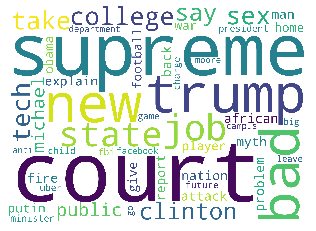

Топик # 1


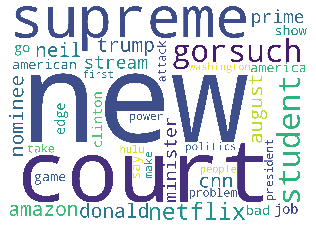

Топик # 2


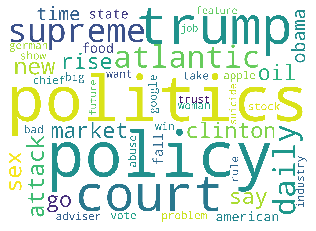

Топик # 3


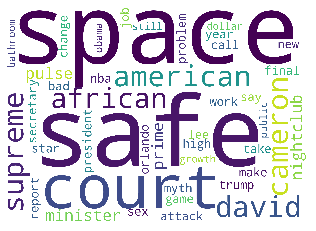

Топик # 4


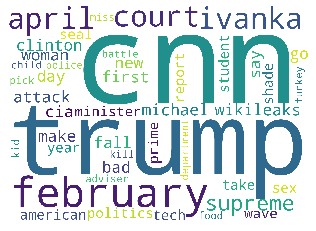

In [520]:
topics_v = []

for i in range(5):
    topics_v.append(terr_model.components_[i])

topics_v_named = []
for j in range(5):
    topics_v_named.append([tf_feature_names2[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(5):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [521]:
themes2 = [54, 52, 51, 47, 46, 43, 39, 38, 35, 25, 24, 17, 3]

In [529]:
df['normalized_title'][df['n_topic'].isin(themes2)]

57718                    nancy reagan s alzheimer s crusade
61403                                         final thought
62954     former doj official i leave due institutional ...
114771                    leonard cohen zen art songwriting
104165                         i have dream speech entirety
                                ...                        
99737            quiz much do know global health revolution
99795                    be next refugee seek asylum europe
100288    view perfect female presidential candidate doe...
100660    progress personify sarah frey turn family s fa...
100835    win election need address rage there view midd...
Name: normalized_title, Length: 35120, dtype: object

In [528]:
vec3 = TfidfVectorizer(stop_words = stopwords,ngram_range=(1,2))

In [530]:
countvec = vec3.fit_transform(df['normalized_title'][df['n_topic'].isin(themes2)])

In [532]:
lda2 = LatentDirichletAllocation(n_components= 15, learning_method='online')
lda2.fit(countvec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

Топик # 0


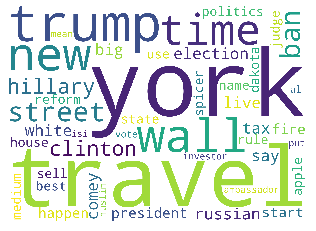

Топик # 1


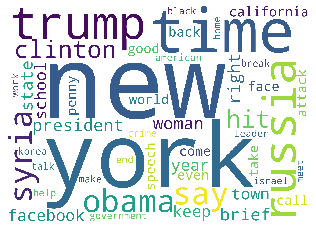

Топик # 2


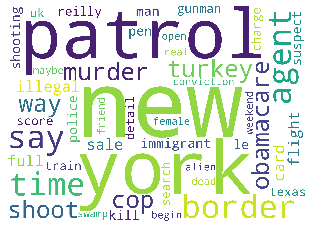

Топик # 3


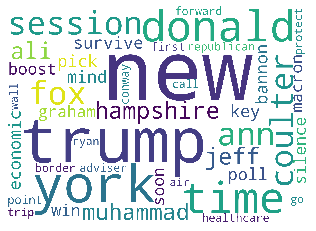

Топик # 4


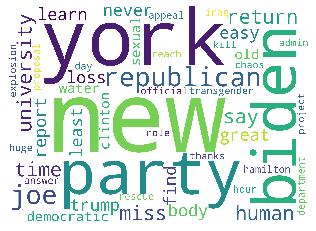

Топик # 5


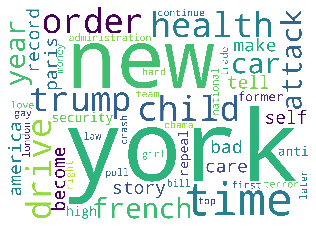

Топик # 6


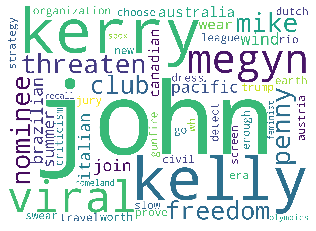

Топик # 7


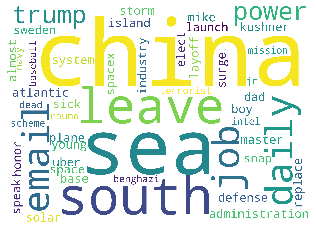

Топик # 8


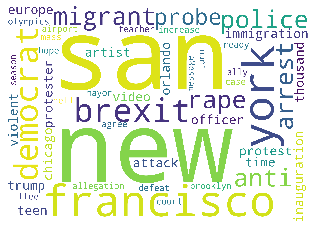

Топик # 9


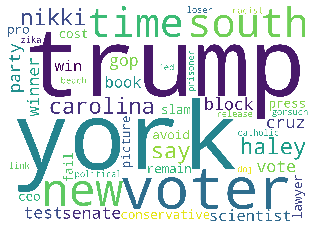

Топик # 10


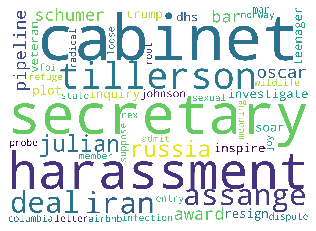

Топик # 11


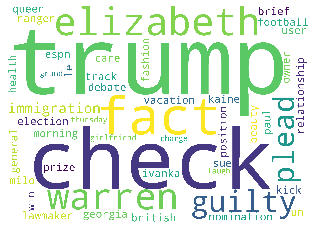

Топик # 12


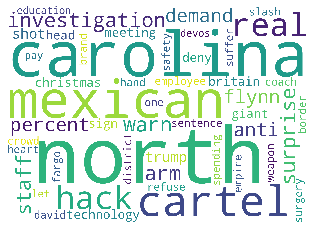

Топик # 13


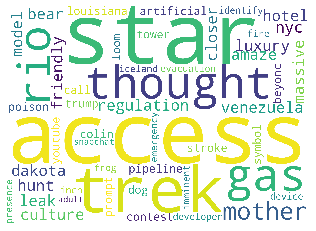

Топик # 14


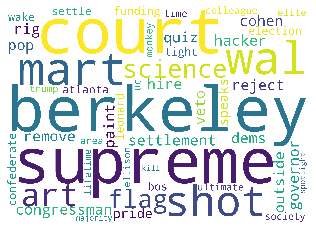

In [533]:
topics_v = []

for i in range(15):
    topics_v.append(lda2.components_[i])

topics_v_named = []
for j in range(15):
    topics_v_named.append([vec3.get_feature_names()[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(15):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [546]:
themes4 = [45,44,35,32,20 ,16,14,3]

vec4 = TfidfVectorizer(stop_words = stopwords,ngram_range=(1,2))
countvec4 = vec4.fit_transform(df['normalized_title'][df['n_topic'].isin(themes4)])

In [547]:
lda4 = LatentDirichletAllocation(n_components= 10, learning_method='online')
lda4.fit(countvec4)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

Топик # 0


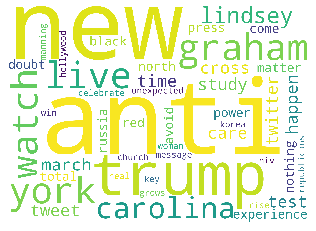

Топик # 1


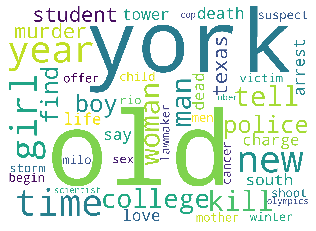

Топик # 2


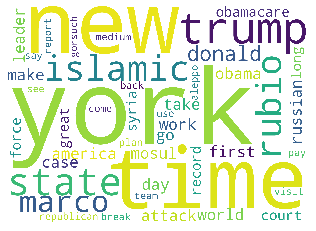

Топик # 3


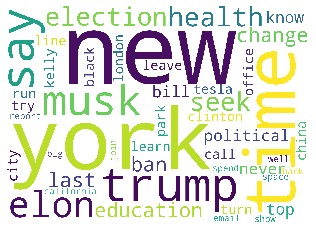

Топик # 4


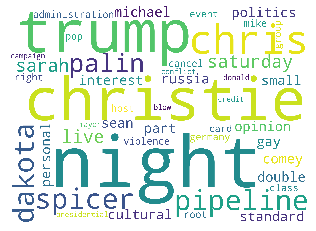

Топик # 5


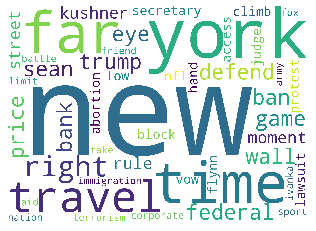

Топик # 6


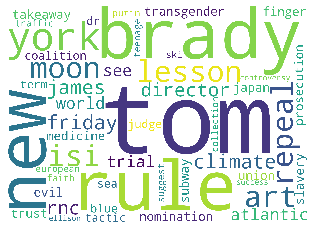

Топик # 7


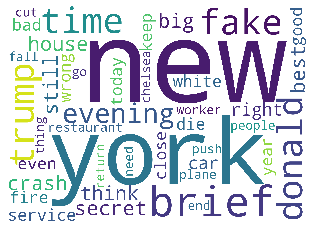

Топик # 8


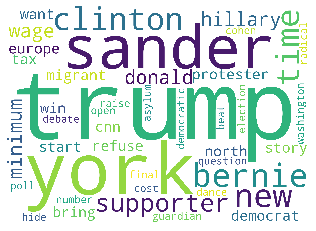

Топик # 9


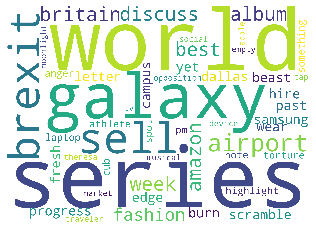

In [549]:
topics_v = []

for i in range(10):
    topics_v.append(lda4.components_[i])

topics_v_named = []
for j in range(10):
    topics_v_named.append([vec4.get_feature_names()[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(10):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [542]:
df['subtopic'] = 

title       date  \
105029  How Nirvana’s ’Smells Like Teen Spirit’ Became... 2000-05-15   
62169          Everything changes. Everything. Especially 2003-06-14   
108303  David Bowie On The Ziggy Stardust Years: ’We W... 2003-09-19   
57718                  Nancy Reagan’s Alzheimer’s Crusade 2004-06-06   
61403                                One final thought on 2004-11-18   
...                                                   ...        ...   
101207  The view from Middletown: For Bernie Sanders s...        NaT   
101950  Progress Personified: NYC subway hero takes hi...        NaT   
102369  Enter the Defining Moment contest for a chance...        NaT   
102987  The view from Middletown: join Gary Younge for...        NaT   
103448        The secret to happiness is all in your head        NaT   

                publication  \
105029                  NPR   
62169   Talking Points Memo   
108303                  NPR   
57718              Fox News   
61403   Talking Points Memo   
...                     ...   
101207             Guardian   
101950             Guardian   
102369             Guardian   
102987             Guardian   
103448             Guardian   

                                         normalized_title  n_topic  \
105029          nirvana s smell teen spirit become anthem       11   
62169             everything change everything especially        8   
108303  david bowie ziggy stardust year be create st c...       53   
57718                  nancy reagan s alzheimer s crusade       25   
61403                                       final thought       47   
...                                                   ...      ...   
101207  view middletown bernie sander supporters vote ...       44   
101950  progress personify nyc subway hero take good d...       26   
102369  enter define moment contest chance be feature ...       56   
102987  view middletown join gary younge unique look e...       50   
103448                           secret happiness be head       22   

        topic_proba            wider_topic    year  
105029     0.670116   immigration&protests  2000.0  
62169      0.508333        domestic issues  2003.0  
108303     0.682318        electoral&party  2003.0  
57718      0.642567        policy&politics  2004.0  
61403      0.591230        domestic issues  2004.0  
...             ...                    ...     ...  
101207     0.198284        policy&politics     NaN  
101950     0.140983  sexual_assault&police     NaN  
102369     0.115454                foreign     NaN  
102987     0.166541  sexual_assault&police     NaN  
103448     0.300956        domestic issues     NaN  

[142568 rows x 8 columns]

 # Estimating biases

In [303]:
df['publication'][df['wider_topic'] == 'sexual_assault&police'].value_counts()

New York Post          2497
Breitbart              2110
NPR                    1587
CNN                    1474
Washington Post        1353
Reuters                1344
Guardian               1096
Atlantic               1005
Business Insider        952
National Review         719
Vox                     589
Talking Points Memo     549
Buzzfeed News           508
Fox News                494
New York Times           60
Name: publication, dtype: int64

In [302]:
df['publication'].value_counts()

Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10709
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5213
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [122]:
topic_freq = df['n_topic'].value_counts()

In [119]:
freq= pd.DataFrame({'topic_num':topic_freq.values,'n_topic':topic_freq.index})

# Более подробный анализ повестки 

In [304]:
df

title       date  \
105029  How Nirvana’s ’Smells Like Teen Spirit’ Became... 2000-05-15   
62169          Everything changes. Everything. Especially 2003-06-14   
108303  David Bowie On The Ziggy Stardust Years: ’We W... 2003-09-19   
57718                  Nancy Reagan’s Alzheimer’s Crusade 2004-06-06   
61403                                One final thought on 2004-11-18   
...                                                   ...        ...   
101207  The view from Middletown: For Bernie Sanders s...        NaT   
101950  Progress Personified: NYC subway hero takes hi...        NaT   
102369  Enter the Defining Moment contest for a chance...        NaT   
102987  The view from Middletown: join Gary Younge for...        NaT   
103448        The secret to happiness is all in your head        NaT   

                publication  \
105029                  NPR   
62169   Talking Points Memo   
108303                  NPR   
57718              Fox News   
61403   Talking Points Memo   
...                     ...   
101207             Guardian   
101950             Guardian   
102369             Guardian   
102987             Guardian   
103448             Guardian   

                                         normalized_title  n_topic  \
105029          nirvana s smell teen spirit become anthem       11   
62169             everything change everything especially        8   
108303  david bowie ziggy stardust year be create st c...       53   
57718                  nancy reagan s alzheimer s crusade       25   
61403                                       final thought       47   
...                                                   ...      ...   
101207  view middletown bernie sander supporters vote ...       44   
101950  progress personify nyc subway hero take good d...       26   
102369  enter define moment contest chance be feature ...       56   
102987  view middletown join gary younge unique look e...       50   
103448                           secret happiness be head       22   

        topic_proba            wider_topic  
105029     0.670116   immigration&protests  
62169      0.508333        domestic issues  
108303     0.682318        electoral&party  
57718      0.642567        policy&politics  
61403      0.591230        domestic issues  
...             ...                    ...  
101207     0.198284        policy&politics  
101950     0.140983  sexual_assault&police  
102369     0.115454                foreign  
102987     0.166541  sexual_assault&police  
103448     0.300956        domestic issues  

[142568 rows x 7 columns]

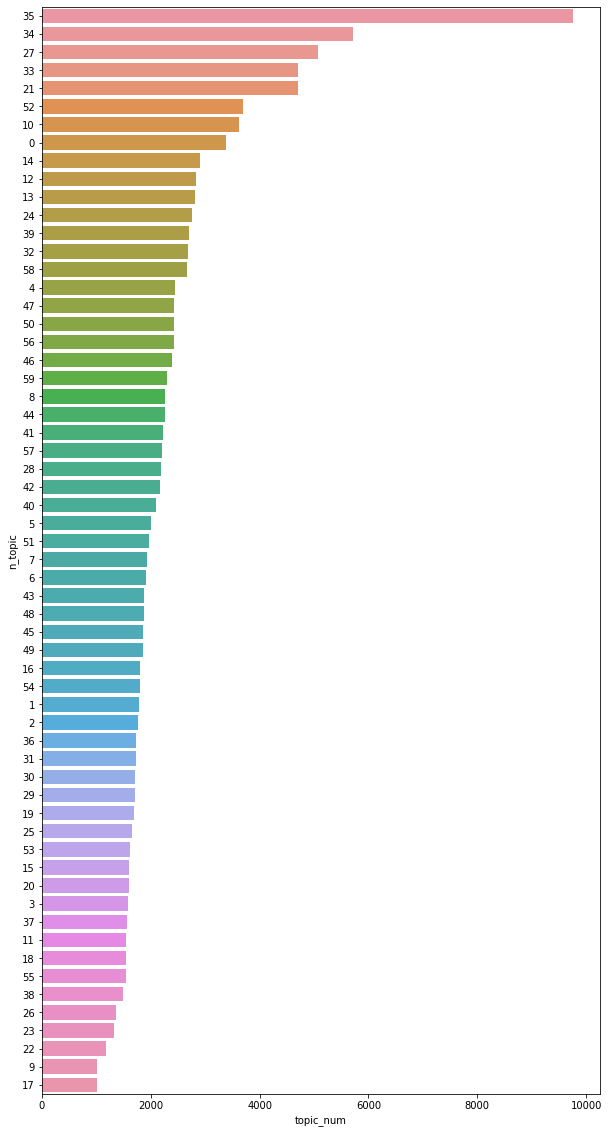

In [132]:
import seaborn as sns
plt.figure(figsize=(10,20))
sns.barplot(y=freq['n_topic'],x='topic_num',data=freq,order = freq['n_topic'],orient = 'h')

In [55]:
df['normalized_title'].str.contains('breitbart')

title       date  \
17077     Top 5 Myths About the Minimum Wage - Breitbart 2013-03-10   
28752  Hillary Takes Veiled Shots at Obama in McAulif... 2013-10-19   
16159  Cartel Bosses Run Mexican Empires from Safe Ho... 2014-12-10   
17620  2015: Sold Out South Carolina Tea Party Conven... 2015-01-17   
27892  Rare Agreement Between NYT, WSJ: ’Clinton Cash... 2015-04-23   
...                                                  ...        ...   
61892  Breitbart Staffer Turned Trump Aide Is Posterb...        NaT   
62103  Bannon ’Livid’ With Breitbart For Report Sugge...        NaT   
62596  FBI Reportedly Looking At Breitbart, InfoWars ...        NaT   
63275  Spicer Gets Into Spat With Breitbart Over Diff...        NaT   
63794  CNN: Former Breitbart Writer Out After Inflamm...        NaT   

               publication                                   normalized_title  \
17077            Breitbart                    top myth minimum wage breitbart   
28752            Breitbart  hillary take veiled shot obama mcauliffe endor...   
16159            Breitbart  cartel boss run mexican empire safe house texa...   
17620            Breitbart  sell out south carolina tea party convention k...   
27892            Breitbart  rare agreement nyt wsj clinton cash be real sc...   
...                    ...                                                ...   
61892  Talking Points Memo  breitbart staffer turn trump aide be posterboy...   
62103  Talking Points Memo  bannon livid breitbart report suggest priebus ...   
62596  Talking Points Memo  fbi reportedly look breitbart infowars part ru...   
63275  Talking Points Memo    spicer get spat breitbart difference fence wall   
63794  Talking Points Memo  cnn former breitbart writer inflammatory tweet...   

       n_topic  topic_proba  
17077       45     0.538185  
28752       51     0.666783  
16159       47     0.530789  
17620       39     0.768228  
27892       41     0.344954  
...        ...          ...  
61892       51     0.216475  
62103       43     0.204336  
62596       13     0.252575  
63275       18     0.246150  
63794       59     0.153028  

[15385 rows x 6 columns]

In [68]:
with pd.option_context('display.max_colwidth', 9999):
    display(df[df['normalized_title'].str.contains('breitbart')])

title  \
17077                                            Top 5 Myths About the Minimum Wage - Breitbart   
28752           Hillary Takes Veiled Shots at Obama in McAuliffe Endorsement Speech - Breitbart   
16159                   Cartel Bosses Run Mexican Empires from Safe Houses in Texas - Breitbart   
17620  2015: Sold Out South Carolina Tea Party Convention Kicks Off In Myrtle Beach - Breitbart   
27892             Rare Agreement Between NYT, WSJ: ’Clinton Cash’ Is a Real Scandal - Breitbart   
...                                                                                         ...   
61892              Breitbart Staffer Turned Trump Aide Is Posterboy For New Admin’s Nationalism   
62103             Bannon ’Livid’ With Breitbart For Report Suggesting Priebus Is On His Way Out   
62596                     FBI Reportedly Looking At Breitbart, InfoWars As Part Of Russia Probe   
63275           Spicer Gets Into Spat With Breitbart Over Difference Between A Fence And A Wall   
63794               CNN: Former Breitbart Writer Out After Inflammatory Tweets On London Attack   

            date          publication  \
17077 2013-03-10            Breitbart   
28752 2013-10-19            Breitbart   
16159 2014-12-10            Breitbart   
17620 2015-01-17            Breitbart   
27892 2015-04-23            Breitbart   
...          ...                  ...   
61892        NaT  Talking Points Memo   
62103        NaT  Talking Points Memo   
62596        NaT  Talking Points Memo   
63275        NaT  Talking Points Memo   
63794        NaT  Talking Points Memo   

                                                                   normalized_title  \
17077                                               top myth minimum wage breitbart   
28752         hillary take veiled shot obama mcauliffe endorsement speech breitbart   
16159                     cartel boss run mexican empire safe house texas breitbart   
17620  sell out south carolina tea party convention kick off myrtle beach breitbart   
27892                 rare agreement nyt wsj clinton cash be real scandal breitbart   
...                                                                             ...   
61892        breitbart staffer turn trump aide be posterboy new admin s nationalism   
62103                          bannon livid breitbart report suggest priebus be way   
62596                      fbi reportedly look breitbart infowars part russia probe   
63275                               spicer get spat breitbart difference fence wall   
63794                  cnn former breitbart writer inflammatory tweet london attack   

       n_topic  topic_proba  
17077       45     0.538185  
28752       51     0.666783  
16159       47     0.530789  
17620       39     0.768228  
27892       41     0.344954  
...        ...          ...  
61892       51     0.216475  
62103       43     0.204336  
62596       13     0.252575  
63275       18     0.246150  
63794       59     0.153028  

[15385 rows x 6 columns]

In [340]:
df['year'] = df['date'].dt.year

In [475]:
time_series = pd.get_dummies(df['n_topic']).set_index(df['date']).resample('D').sum()
time1  = time_series[time_series.index > '2013-01-01']

In [436]:
time1 = time1.filter([9,29,33,36])

date
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

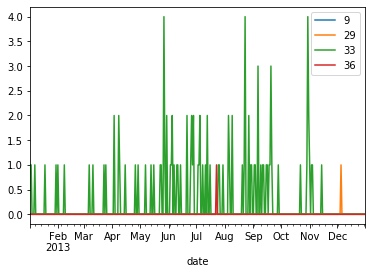

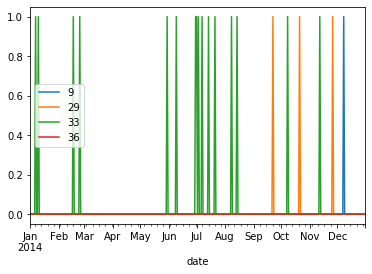

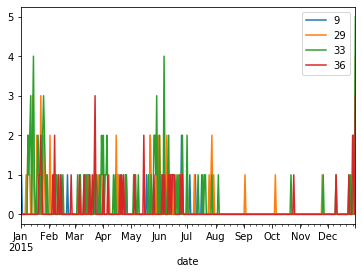

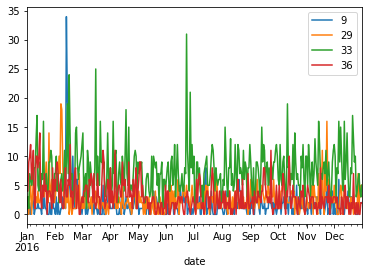

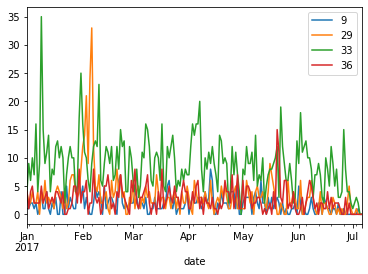

In [463]:
time1.groupby(by =[time1.index.year]).plot()

C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Anastasia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

date  date
1     2013    AxesSubplot(0.125,0.125;0.775x0.755)
      2014    AxesSubplot(0.125,0.125;0.775x0.755)
      2015    AxesSubplot(0.125,0.125;0.775x0.755)
      2016    AxesSubplot(0.125,0.125;0.775x0.755)
      2017    AxesSubplot(0.125,0.125;0.775x0.755)
2     2013    AxesSubplot(0.125,0.125;0.775x0.755)
      2014    AxesSubplot(0.125,0.125;0.775x0.755)
      2015    AxesSubplot(0.125,0.125;0.775x0.755)
      2016    AxesSubplot(0.125,0.125;0.775x0.755)
      2017    AxesSubplot(0.125,0.125;0.775x0.755)
3     2013    AxesSubplot(0.125,0.125;0.775x0.755)
      2014    AxesSubplot(0.125,0.125;0.775x0.755)
      2015    AxesSubplot(0.125,0.125;0.775x0.755)
      2016    AxesSubplot(0.125,0.125;0.775x0.755)
      2017    AxesSubplot(0.125,0.125;0.775x0.755)
4     2013    AxesSubplot(0.125,0.125;0.775x0.755)
      2014    AxesSubplot(0.125,0.125;0.775x0.755)
      2015    AxesSubplot(0.125,0.125;0.775x0.755)
      2016    AxesSubplot(0.125,0.125;0.775x0.755)
      2017    AxesSu

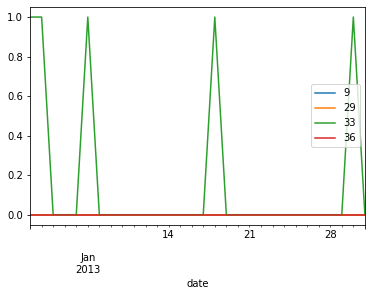

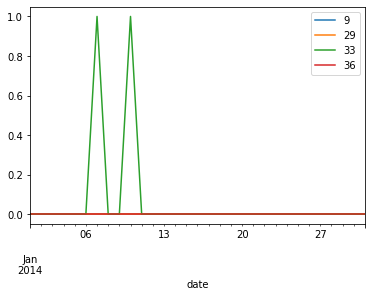

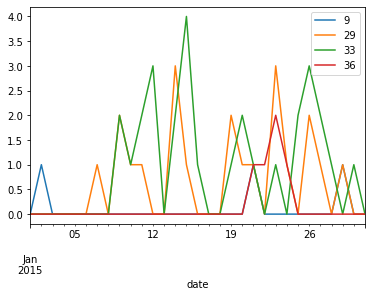

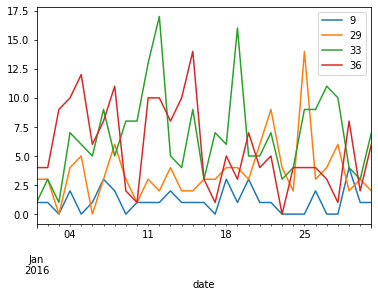

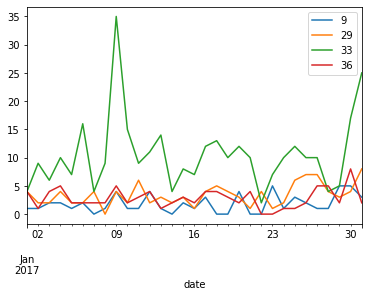

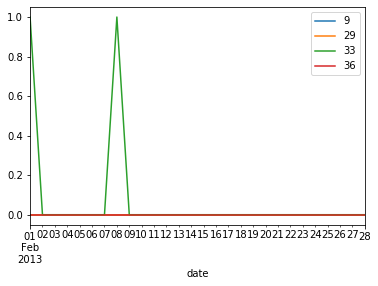

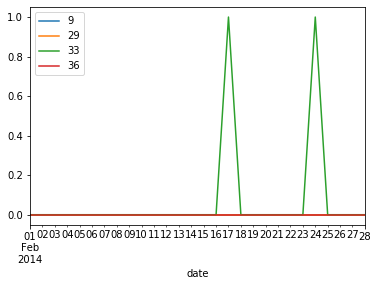

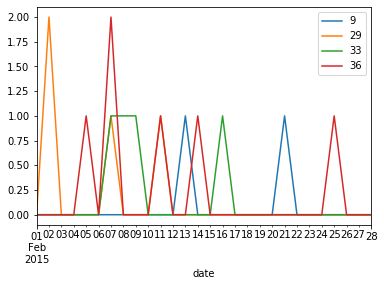

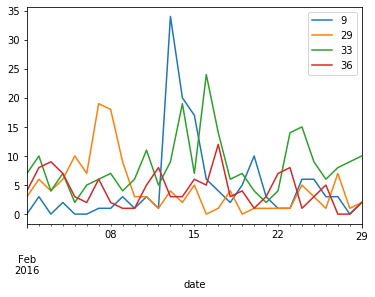

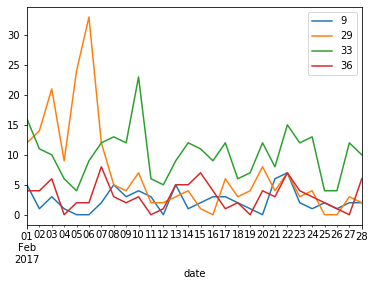

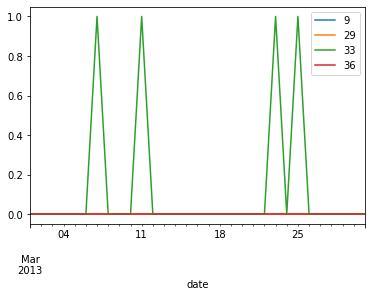

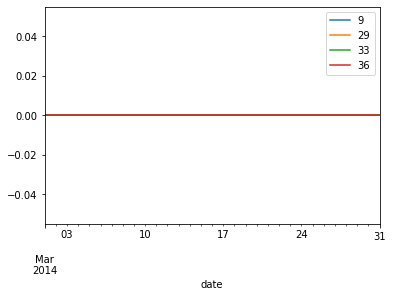

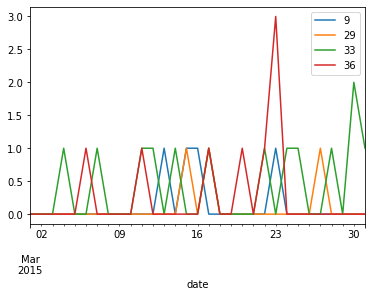

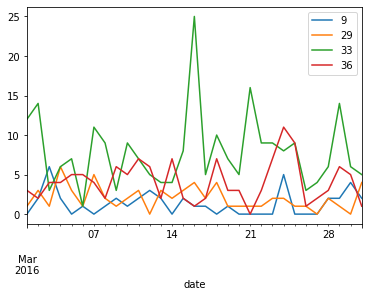

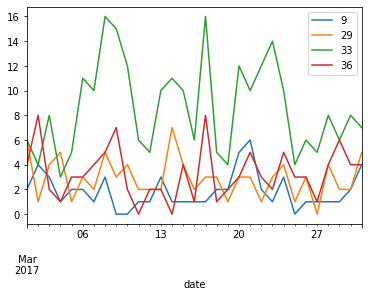

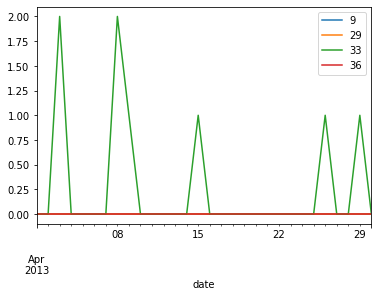

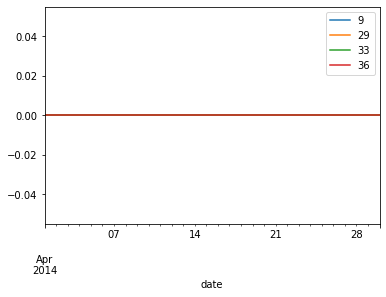

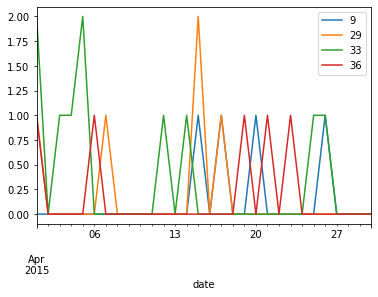

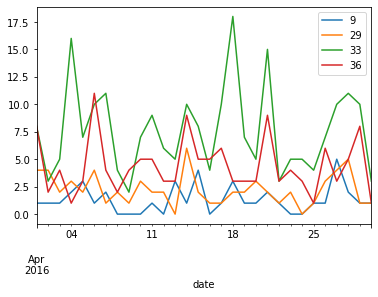

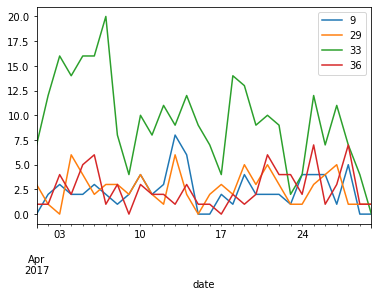

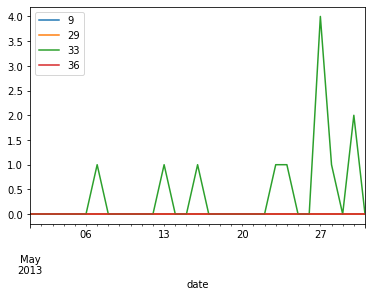

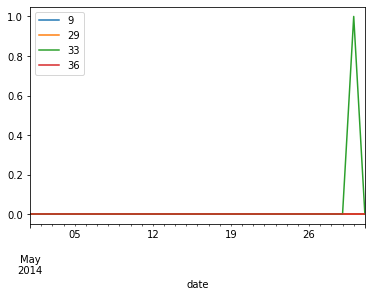

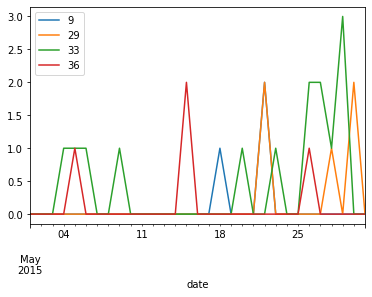

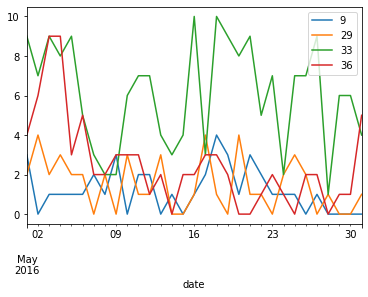

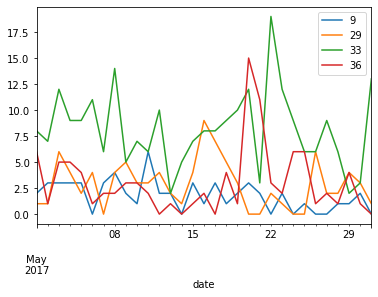

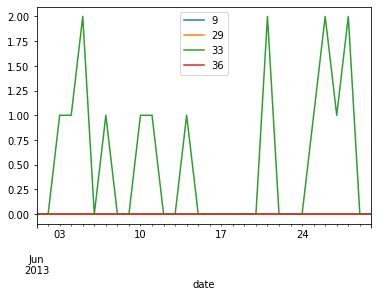

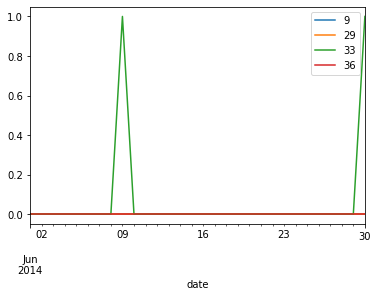

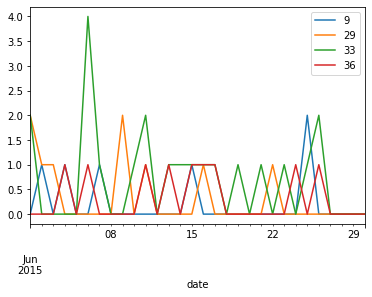

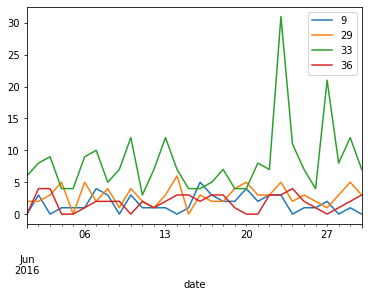

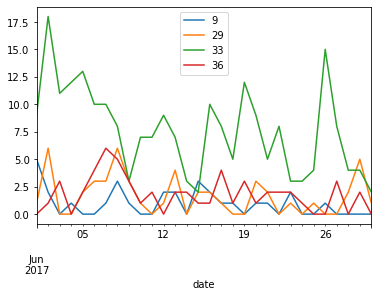

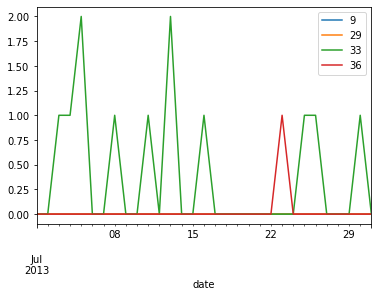

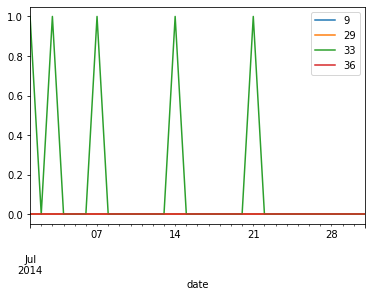

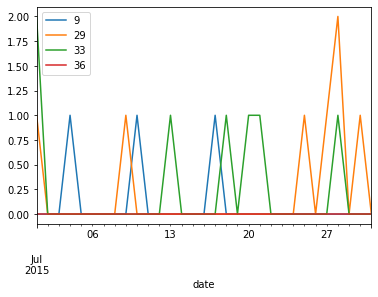

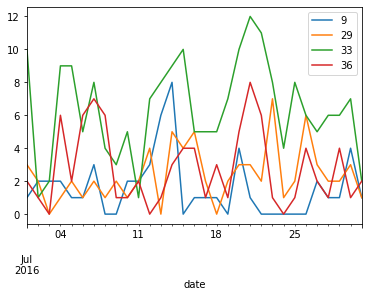

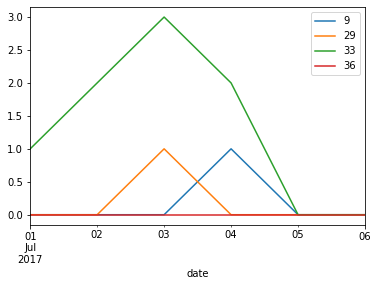

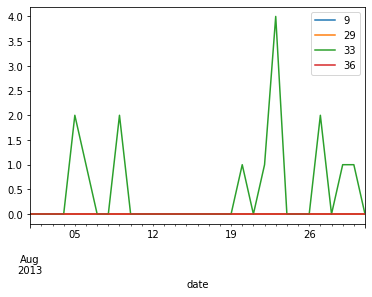

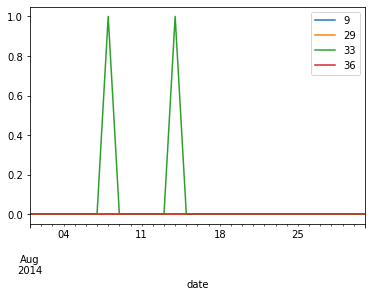

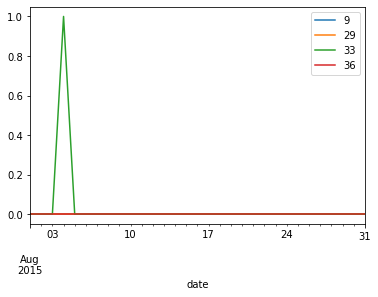

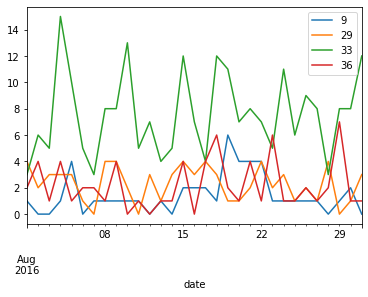

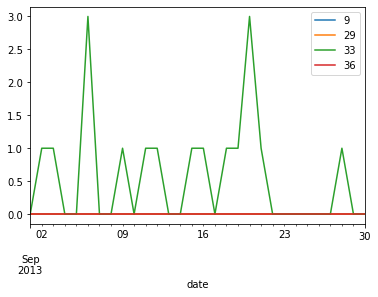

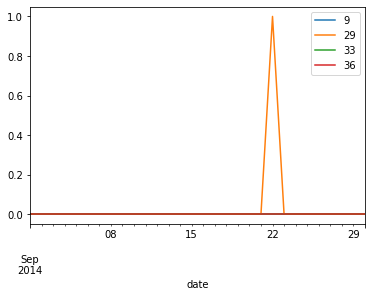

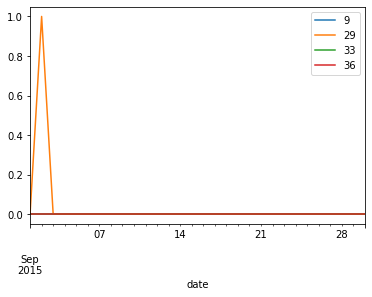

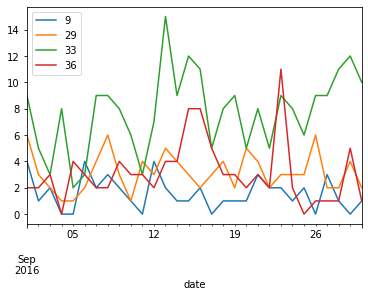

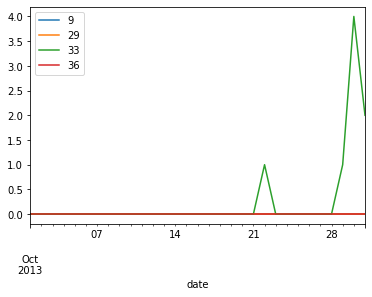

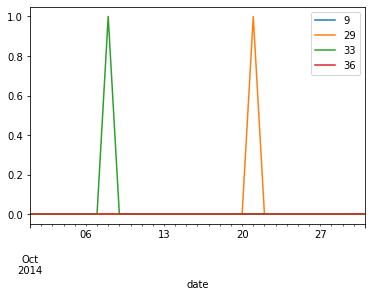

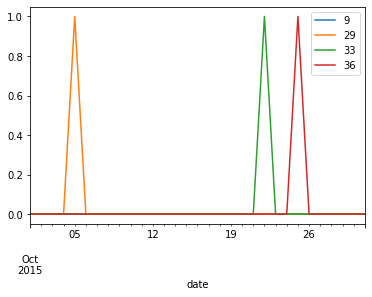

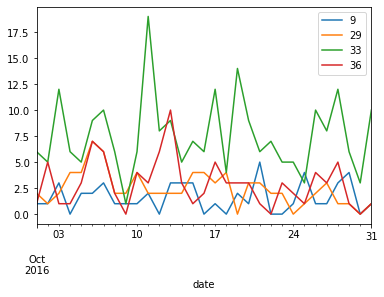

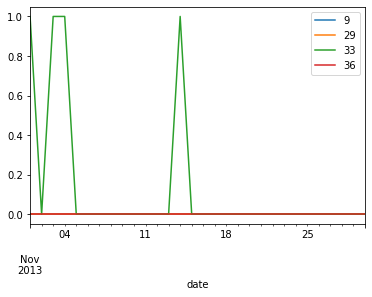

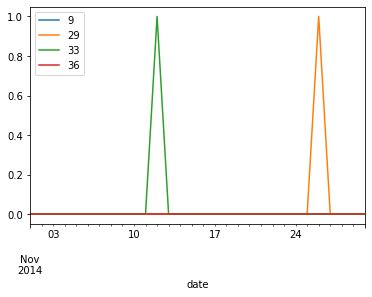

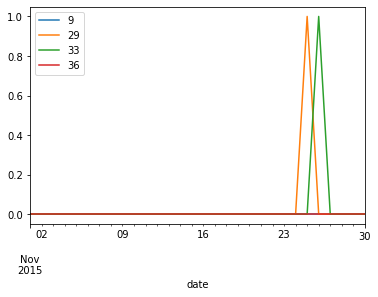

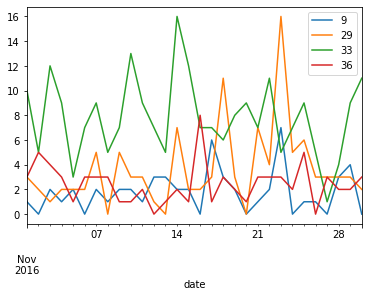

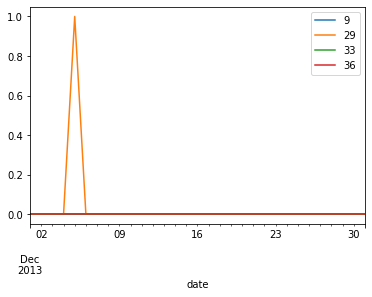

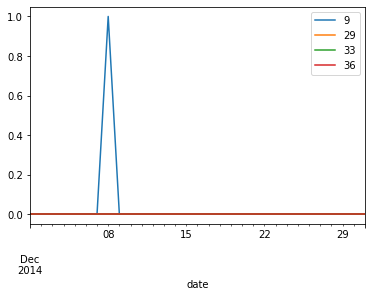

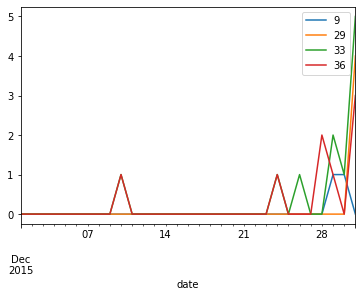

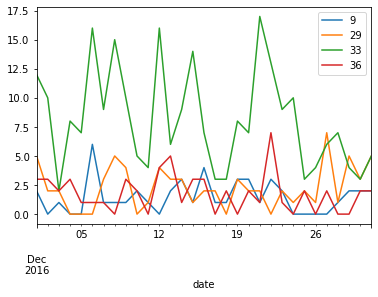

In [447]:
time1.groupby(by=[time1.index.month, time1.index.year]).plot()

In [404]:
df['publication'][df['year'] >= 2016].value_counts().values

array([23706, 17446, 11820, 11078, 10686,  8624,  7926,  7799,  7179,
        6757,  6171,  4878,  4854,  4322,  2561], dtype=int64)

**estimating on 2016 и 2017 - russia and north Korea bias**

In [405]:
df['publication'][df['wider_topic'] == 'foreign'][df['year'] >= 2016].value_counts()
   


Breitbart              3059
New York Post          1846
Washington Post        1364
NPR                    1358
Reuters                1202
Guardian                943
Business Insider        924
Atlantic                871
CNN                     806
National Review         756
Vox                     585
Buzzfeed News           575
Fox News                404
Talking Points Memo     278
New York Times           89
Name: publication, dtype: int64

In [355]:
df['publication'][df['year'] == 2017].value_counts()

New York Post          8461
Breitbart              7606
Reuters                4522
Guardian               4340
NPR                    4173
New York Times         4171
Washington Post        3844
CNN                    3822
Business Insider       2161
Atlantic               2029
National Review        1981
Vox                    1621
Buzzfeed News          1600
Talking Points Memo      73
Name: publication, dtype: int64

In [468]:
df['n_topic'][df['wider_topic'] == 'immigration&protests'].value_counts()

12    2829
32    2694
43    1874
11    1554
Name: n_topic, dtype: int64

In [332]:
df['n_topic'][df['wider_topic'] == 'electoral&party'].value_counts()

39    2706
46    2398
42    2163
54    1797
53    1618
37    1566
Name: n_topic, dtype: int64

In [305]:
import pyLDAvis
from pyLDAvis.sklearn import prepare as sklearn_prepare
pyLDAvis.enable_notebook()

sklearn_prepare(model, cv, vec)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
46     0.131456 -0.070305       1        1  3.894820
43     0.108635 -0.010016       2        1  2.532927
21     0.147057 -0.065261       3        1  2.529762
25    -0.001779  0.020376       4        1  2.509902
24     0.032842  0.119146       5        1  2.414526
8      0.158851 -0.020308       6        1  2.319378
20     0.140636  0.184153       7        1  2.144270
7      0.043616  0.071039       8        1  2.085405
36     0.055901 -0.104974       9        1  1.938985
26    -0.051237  0.006880      10        1  1.936897
54     0.059324  0.033406      11        1  1.933181
1      0.086927  0.136744      12        1  1.918567
23     0.057764  0.071188      13        1  1.909437
14     0.014015  0.055961      14        1  1.889136
55     0.129259 -0.048220      15        1  1.875579
44     0.063386 -0.108400      16        1  1.872121
56    -0.012752  0.040056      17        1  1.871244
13     0.016460  0.028506      18        1  1.849040
4      0.079567 -0.112361      19        1  1.781874
53     0.022114  0.059596      20        1  1.760543
42    -0.013528  0.041222      21        1  1.752751
27     0.006244  0.038714      22        1  1.743003
2      0.023030  0.097087      23        1  1.713019
38     0.085031 -0.067379      24        1  1.712303
0     -0.019970 -0.084239      25        1  1.672263
51     0.014923  0.014650      26        1  1.656261
28     0.008058 -0.081893      27        1  1.645062
33     0.058035  0.131546      28        1  1.632504
15     0.020351 -0.197696      29        1  1.622376
9     -0.018730  0.017982      30        1  1.613352
40    -0.070626  0.007658      31        1  1.600523
52     0.034053 -0.073475      32        1  1.596658
5      0.090868 -0.113036      33        1  1.544674
45    -0.023335 -0.088220      34        1  1.534567
29    -0.003042  0.035923      35        1  1.531101
41    -0.063328  0.010400      36        1  1.516994
59    -0.020161 -0.005027      37        1  1.496254
32     0.024771  0.043225      38        1  1.478468
22     0.040316  0.054714      39        1  1.456716
31    -0.029896  0.013115      40        1  1.452137
47    -0.004988  0.026789      41        1  1.433588
18    -0.069040 -0.006360      42        1  1.431017
34    -0.046247  0.024178      43        1  1.416389
12    -0.092333 -0.000535      44        1  1.392797
50    -0.085187  0.002126      45        1  1.345388
37    -0.082674  0.004551      46        1  1.320878
16    -0.007935 -0.105995      47        1  1.296083
58    -0.046992 -0.007224      48        1  1.294258
39    -0.108346 -0.006504      49        1  1.285307
19    -0.011432  0.115627      50        1  1.282002
10    -0.057768  0.001645      51        1  1.270909
6     -0.103139 -0.004552      52        1  1.257914
17    -0.114838 -0.008984      53        1  1.250356
3     -0.017943  0.021232      54        1  1.242004
30    -0.117749 -0.010116      55        1  1.162539
57    -0.012962 -0.092853      56        1  1.153816
48    -0.091679 -0.000328      57        1  1.150735
35    -0.117974 -0.010191      58        1  1.069077
49    -0.120552 -0.011193      59        1  1.024091
11    -0.115328 -0.013790      60        1  0.982269, topic_info=               Term         Freq        Total Category  logprob  loglift
5414  trump address  3148.000000  3148.000000  Default  30.0000  30.0000
5983           york  1371.000000  1371.000000  Default  29.0000  29.0000
3487       new year  1371.000000  1371.000000  Default  28.0000  28.0000
5985      york time  1162.000000  1162.000000  Default  27.0000  27.0000
484             big  1002.000000  1002.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
5062         summer    48.155074    49.501386  Topic60  -4.2979   4.5955
3024           long    46.796129    48.142441  Topic60  -4.3265   4.5947
307         at

In [225]:
topics_foreign = [56,36,33,14,9]
len(df[df['n_topic'].isin(topics_foreign)])

12779

In [ ]:
pd.Dataframe()

# По NY_times

In [191]:
dfny = pd.read_pickle('./NYfull_processed.pickle')

In [192]:
dfny = dfny[['pub_date','news_desk','section_name','word_count','snippet_norm','headline_norm']]

In [193]:
badsections =['Crosswords/Games','Style', 'Arts', 'Sports', 'Business Day', 'Technology', 'Travel',
 'Science', 'Magazine', 'T:Style', 'Corrections', 'Health',  'Theater', 'Books', 'T Magazine', 'Business', 'Multimedia',
 'Autos', 'Great Homes & Destinations', 'Movies', 'Open', 'Dining & Wine', 'Real Estate', 'Food',
  'Home & Garden', 'Crosswords & Games', 'Fashion & Style', 'Multimedia/Photos','Automobiles',
'Movies; Arts','Books; Arts','Corrections; Real Estate',
       'Front Page; Business', 'Corrections; Arts',
       'Corrections; Books; Arts', 'Corrections; Magazine',
       'Education; Arts', 'Theater; Arts', 'Business; Health',
       'Education; Books; Theater; Arts', 'Books; Style; Dining and Wine',
'Movies; Books; Arts',
       'Style; Dining and Wine', 'Corrections; Style',
       'Movies; Theater; Arts', 'Front Page','Books; Movies; Arts','Magazine; Style', 'Sports; Opinion',
       'Style; Opinion',
       'Business; Technology', 'Business; Movies', 'Business; Books',
       'Blogs', 'Health; Science', 'Corrections; Style; Dining and Wine','Movies; Technology',
       'Style; Home and Garden','Travel; Magazine; Style', 'Travel; Style',
       'Education; Business; Science; Technology', 'Movies; Arts; Technology',
       'Corrections; Style; Home and Garden',
       'Washington; Books; Movies; Arts',  'Education; Theater; Arts', 'Washington; Books; Arts',
       'Global Home', 'Style; Opinion; Home and Garden',
       'Movies; Obituaries', 'Books; Obituaries', 'Magazine; Style; Arts',
        'Corrections; Automobiles', 
      'Technology', 'Books; New York and Region',   'Movies; Automobiles', 
 'Art & Design', 'College Football', 'Pro Football', 'Soccer', 'Personal Tech','College Basketball', 'Pro Basketball', 'Bridge',
 'Book Review','Awards Season', 'Sunday Book Review', 'Weddings', 'Golf',
       'Space & Cosmos', 'América', 'Tennis', 'Asset Allocation',
       'Commercial Real Estate', "Men's Runway", 'New Cars',
       'International Arts', 'Olympics', 'Mutual Funds',
 "Women's Runway", 'International Sports', 'Auto Racing', 'Rugby',
       'International Style', 'Skiing', 'Video Games', 'Couture Runway',  'The Learning Network', 'membercenter',
       'Podcasts', 'Well', 'Briefing', 'Watching', 'Lesson Plans',
       'DealBook', 'Live', 'Men’s Style',  'Move', 'Family','Design & Interiors', 'Entertainment',
       'Fashion & Beauty', 'Entrepreneurship', 'Estate Planning', 'Art','Baseball',
       'Mind', 'Australia', 'Eat','Wheels','Horse Racing', 'Sailing', 'Columnists', 'Beauty',
       'Contributors', 'Editorials', 'Great Homes and Destinations','Hockey','At Home',
       'Wine, Beer & Cocktails', 'Credit Scores','Music','Paid Death Notices']

In [194]:
baddes = ['Styles', 'TStyle','Movies, Performing Arts/Weekend Desk', 'Book Review Desk', 'Sports Desk', 'The Arts/Cultural Desk', 'Science',
          'Home', 'Dining', 'Blogs', 'RealEstate', 'Magazine','Travel','Arts and Leisure Desk','Culture','Museums','Fashion & Style','Movies',
          'Theater', 'T Magazine', 'Food', 'Automobiles', 'Technology', 'Arts / Television','Books','Health / Health Guide','Books', 'NYTI', 'Crosswords & Games']

In [195]:
dfny = dfny[~dfny['news_desk'].isin(baddes)]

In [138]:
dfny = dfny[~dfny['section_name'].isin(badsections)]

In [196]:
dfny

pub_date       news_desk      section_name word_count  \
0    2013-01-01 00:00:00+00:00  World / Africa             World          0   
1    2013-01-01 22:00:26+00:00            None  Crosswords/Games        365   
2    2013-01-01 00:00:00+00:00            U.S.              U.S.         21   
3    2013-01-01 21:22:53+00:00            None           Opinion        342   
4    2013-01-01 00:00:00+00:00           Metro     N.Y. / Region        184   
...                        ...             ...               ...        ...   
4062 2020-05-19 19:00:07+00:00            OpEd           Opinion        966   
4063 2020-05-19 21:57:27+00:00         Foreign             World       1357   
4065 2020-05-19 13:40:42+00:00         Foreign             World       1134   
4067 2020-05-20 01:16:09+00:00         Foreign             World        784   
4068 2020-05-20 04:13:02+00:00        Business      Business Day       1314   

                                           snippet_norm  \
0     nelson mandela lead emancipator south africa f...   
1       david steinberg return artificially color world   
2     end th congress lawmaker lurch deal avoid sign...   
3      year old thought cervantes applies turbulent era   
4     list government office other service be close ...   
...                                                 ...   
4062              be company s most disruptive move yet   
4063  not like back home twilight career angela merk...   
4065  airstrikes destroy much health center militant...   
4067  israel be cyberattack disrupt major port iran ...   
4068        live stock market news coronavirus pandemic   

                                          headline_norm  
0                 mandela dissident liberator statesman  
1                                      make scent thing  
2                         passage tax deal hang balance  
3                          advice cervantes suit plunge  
4                        holiday tuesday new year s day  
...                                                 ...  
4062                            twitter end office know  
4063  crisis too many coronavirus push germany shift...  
4065  clinic bomb afghan force fend off taliban atta...  
4067  israel hack iran port be late salvo exchange c...  
4068      asian market mix coronavirus news live update  

[532086 rows x 6 columns]

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
vec2 = TfidfVectorizer(stop_words = stopwords,  ngram_range=(1, 2),max_features = 5000 )
cv2 = vec.fit_transform(dfny['snippet_norm'].dropna())

532086

In [161]:
model2 = LatentDirichletAllocation(n_components = 65,learning_method = 'online' )

In [165]:
model2.fit(cv2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=65, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [167]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

n_top_words = 20

print("\nTopics в модели LDA: ")

# Получаем топики
tf_feature_names2 = vec.get_feature_names()
print_top_words(model2, tf_feature_names2, n_top_words)


Topics в модели LDA: 

Topic #0: make case heroin prefer meltdown president say brand de provide golf course september pay cohen poland joe crush coalition gop leader house speaker complex gold

Topic #1: reputation poll trump catch fire shirt ford attend cap inc aircraft explains front line anybody forest president trump snap pant sony gop health advocate anti lgbt

Topic #2: plan parenthood seriously plane crash graffiti denial social security aside executive action munich example natural call trump idiot serial killer epa marry creation nfl actress katy

Topic #3: shelter shift refusal stake skeptical prosecutor say farage professor person boko haram magical flower ash explain safe space responds curse michigan release artificial

Topic #4: harm lease century cleric michelle dy age kathy highlight kaepernick apps passport new yorkers anne fake news social justice simon poverty fund flint shortage

Topic #5: bombing cop killer myanmar sander campaign deny smell munich pad fcc spiral

Топик # 0


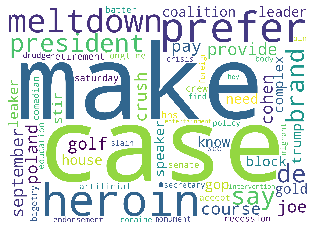

Топик # 1


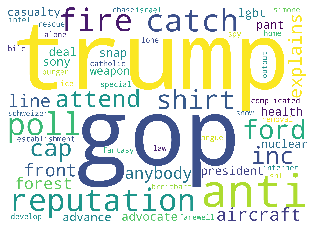

Топик # 2


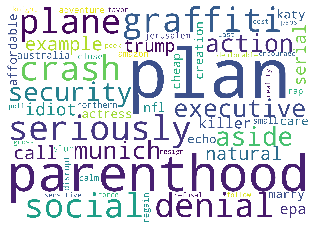

Топик # 3


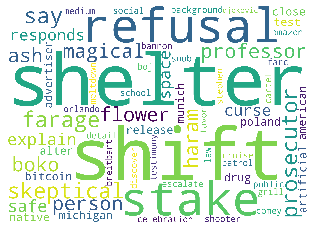

Топик # 4


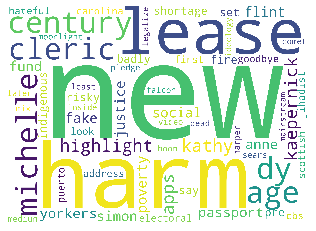

Топик # 5


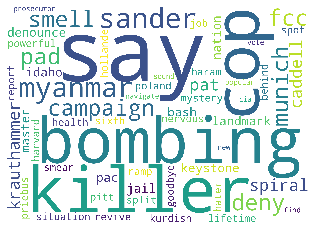

Топик # 6


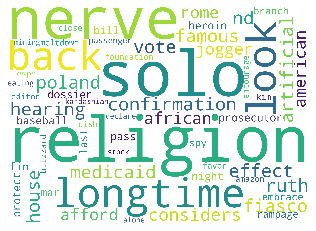

Топик # 7


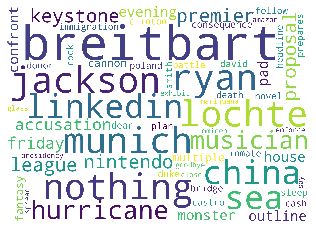

Топик # 8


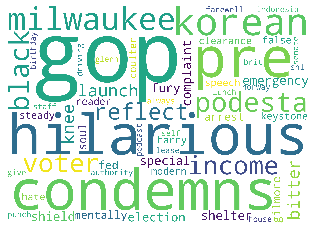

Топик # 9


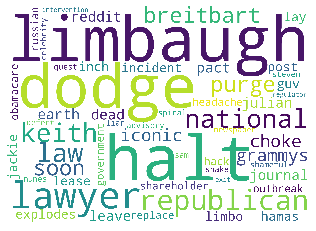

Топик # 10


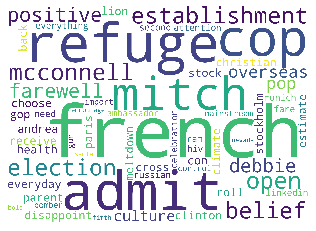

Топик # 11


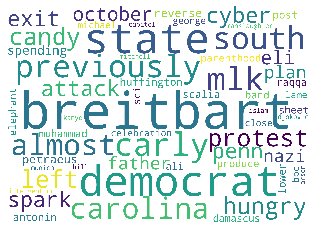

Топик # 12


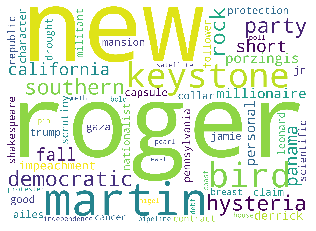

Топик # 13


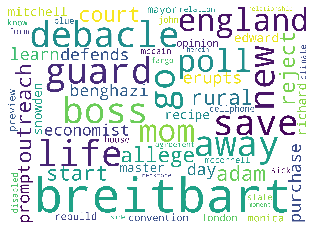

Топик # 14


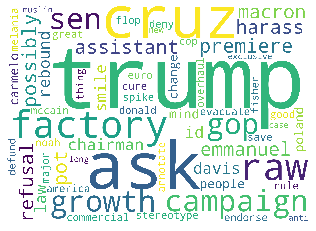

Топик # 15


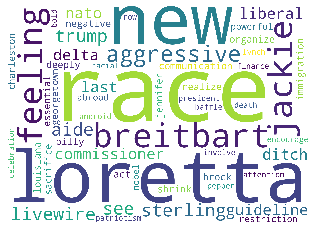

Топик # 16


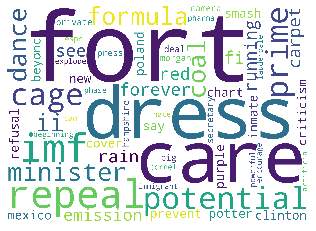

Топик # 17


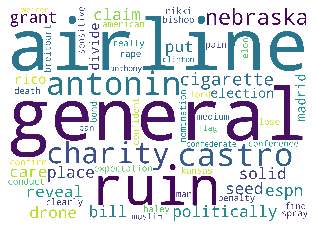

Топик # 18


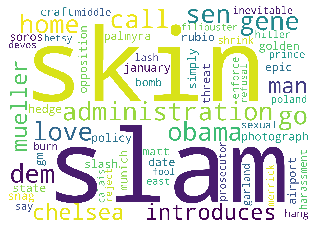

Топик # 19


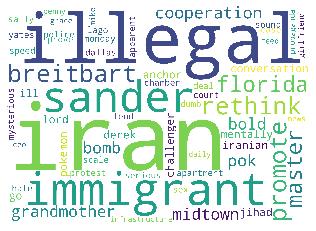

Топик # 20


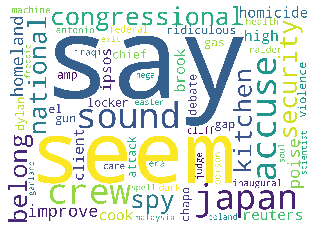

Топик # 21


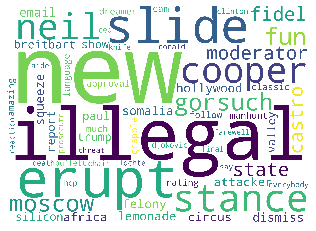

Топик # 22


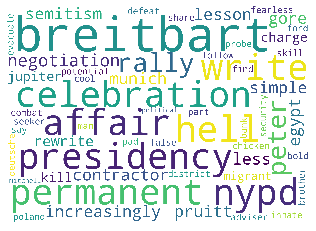

Топик # 23


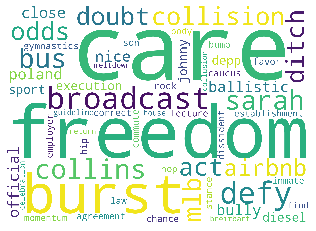

Топик # 24


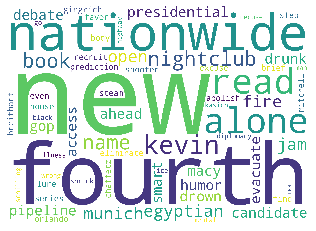

Топик # 25


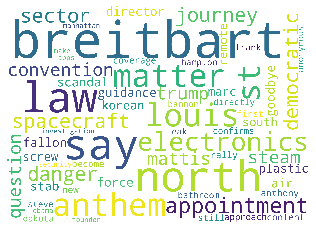

Топик # 26


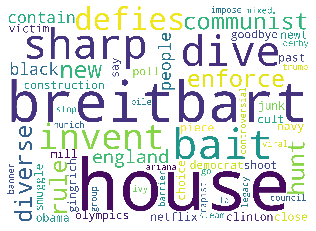

Топик # 27


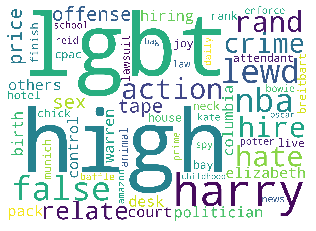

Топик # 28


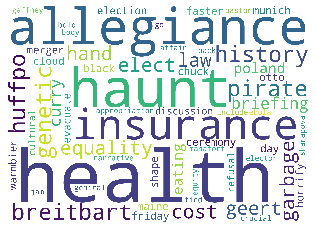

Топик # 29


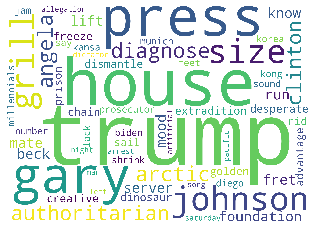

Топик # 30


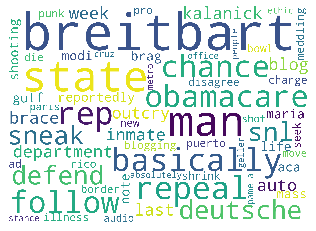

Топик # 31


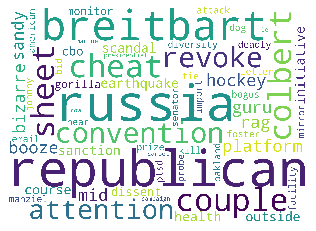

Топик # 32


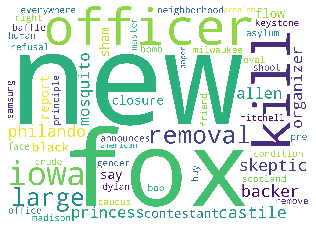

Топик # 33


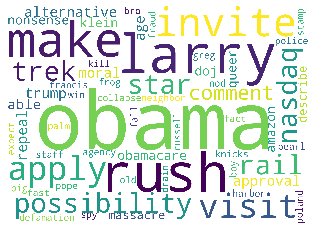

Топик # 34


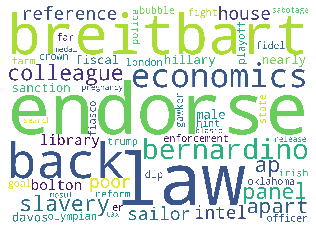

Топик # 35


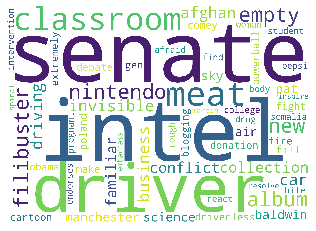

Топик # 36


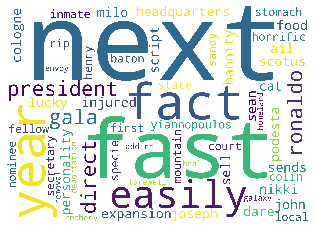

Топик # 37


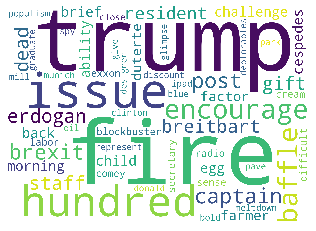

Топик # 38


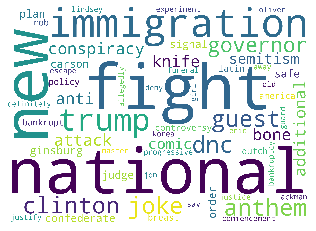

Топик # 39


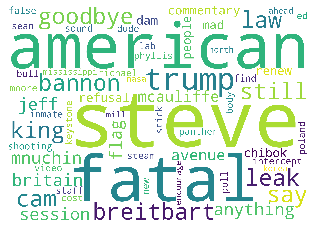

Топик # 40


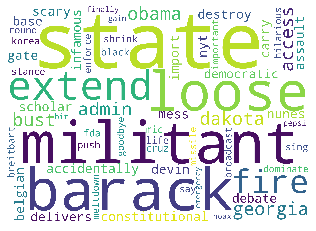

Топик # 41


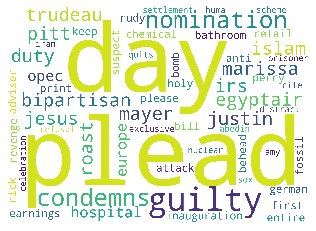

Топик # 42


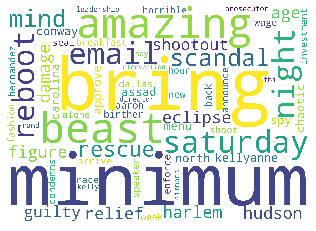

Топик # 43


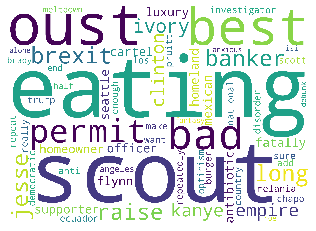

Топик # 44


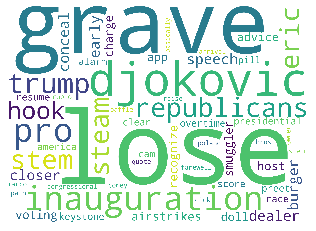

Топик # 45


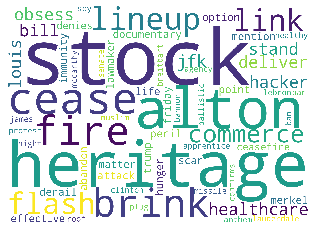

Топик # 46


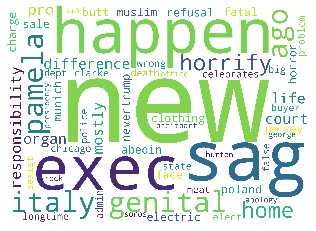

Топик # 47


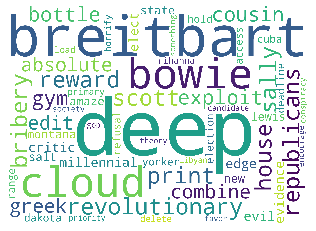

Топик # 48


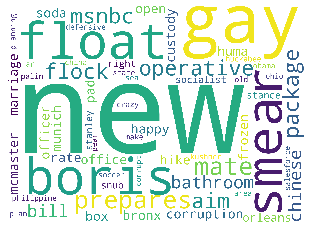

Топик # 49


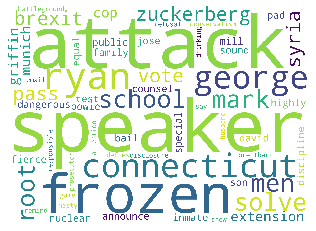

Топик # 50


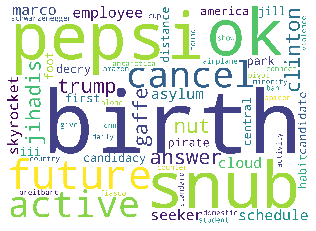

Топик # 51


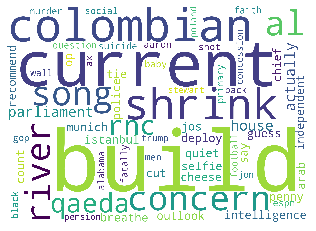

Топик # 52


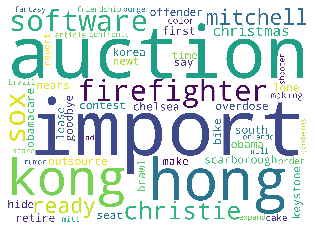

Топик # 53


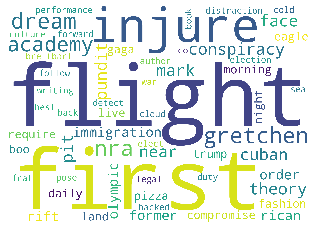

Топик # 54


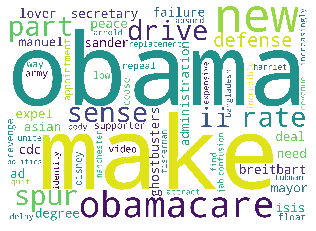

Топик # 55


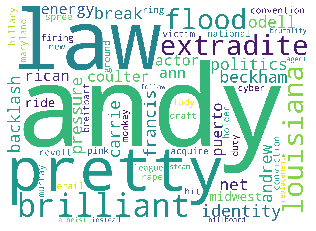

Топик # 56


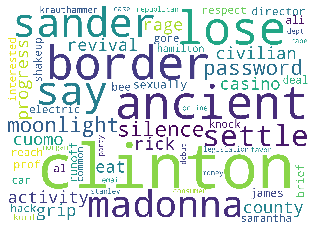

Топик # 57


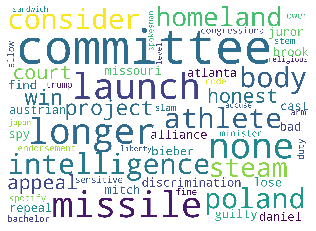

Топик # 58


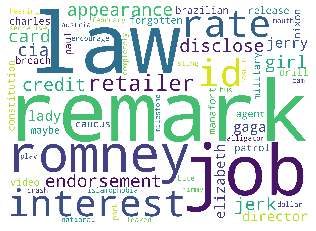

Топик # 59


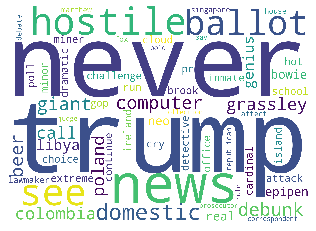

Топик # 60


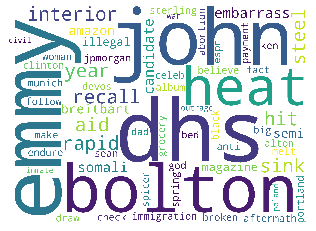

Топик # 61


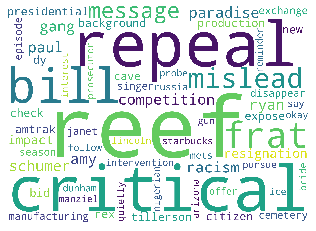

Топик # 62


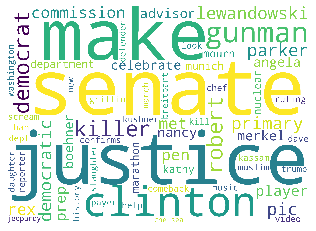

Топик # 63


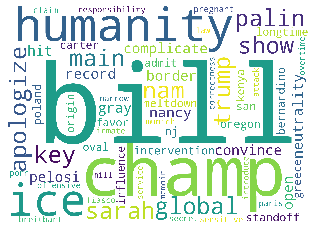

Топик # 64


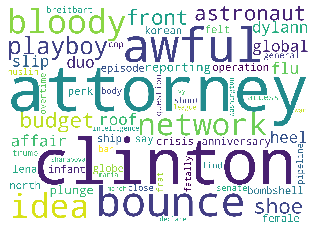

In [168]:
topics_v = []

for i in range(65):
    topics_v.append(model2.components_[i])

topics_v_named = []
for j in range(65):
    topics_v_named.append([tf_feature_names2[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(65):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [175]:
dfny['snippet_norm'].str.contains('breitbart')

0       False
2       False
3       False
4       False
6       False
        ...  
4061    False
4062    False
4063    False
4065    False
4067    False
Name: snippet_norm, Length: 302786, dtype: bool

In [211]:
df[df['n_topic'] == 36]

title       date  \
62462  King: For Every Valedictorian DREAMer, 100 Are... 2013-07-23   
40074                                  Saudi beheadings: 2015-01-21   
40080                  Saudi Arabia’s King Abdullah dies 2015-01-22   
40108             Who is Saudi Arabia’s new King Salman? 2015-01-23   
40120                   Bears overdose on chocolate bait 2015-01-23   
...                                                  ...        ...   
63148  Trump’s Trickle Down Tax Plan Is Already In Tr...        NaT   
63388  Top Senate Intel Republican ‘Troubled’ By Come...        NaT   
63423  This Was Not Normal: Russian Foreign Minister ...        NaT   
63538  Asked If He Interfered With Flynn Probe, Trump...        NaT   
63728  Draft Trump Rule Shows Broad Opt-Out To Obamac...        NaT   

               publication                                   normalized_title  \
62462  Talking Points Memo  king valedictorian dreamer be haul pound marij...   
40074                  CNN                                    saudi beheading   
40080                  CNN                    saudi arabia s king abdullah dy   
40108                  CNN                  be saudi arabia s new king salman   
40120                  CNN                       bear overdose chocolate bait   
...                    ...                                                ...   
63148  Talking Points Memo  trump s trickle tax plan be already trouble co...   
63388  Talking Points Memo   top senate intel republican trouble comey firing   
63423  Talking Points Memo     be not normal russian foreign minister edition   
63538  Talking Points Memo  ask interfere flynn probe trump say next question   
63728  Talking Points Memo  draft trump rule show broad opt out obamacare ...   

       n_topic  topic_proba  
62462       36     0.508746  
40074       36     0.508333  
40080       36     0.570289  
40108       36     0.618282  
40120       36     0.671284  
...        ...          ...  
63148       36     0.179963  
63388       36     0.166462  
63423       36     0.278601  
63538       36     0.148706  
63728       36     0.251134  

[1732 rows x 6 columns]

pub_date       news_desk   section_name word_count  \
0    2013-01-01 00:00:00+00:00  World / Africa          World          0   
2    2013-01-01 00:00:00+00:00            U.S.           U.S.         21   
3    2013-01-01 21:22:53+00:00            None        Opinion        342   
4    2013-01-01 00:00:00+00:00           Metro  N.Y. / Region        184   
6    2013-01-01 19:52:19+00:00            None        Opinion        786   
...                        ...             ...            ...        ...   
4061 2020-05-19 09:00:14+00:00            OpEd        Opinion       1707   
4062 2020-05-19 19:00:07+00:00            OpEd        Opinion        966   
4063 2020-05-19 21:57:27+00:00         Foreign          World       1357   
4065 2020-05-19 13:40:42+00:00         Foreign          World       1134   
4067 2020-05-20 01:16:09+00:00         Foreign          World        784   

                                           snippet_norm  \
0     nelson mandela lead emancipator south africa f...   
2     end th congress lawmaker lurch deal avoid sign...   
3      year old thought cervantes applies turbulent era   
4     list government office other service be close ...   
6     let resolve develop clear plan improve food sy...   
...                                                 ...   
4061                       haven t address sin election   
4062              be company s most disruptive move yet   
4063  not like back home twilight career angela merk...   
4065  airstrikes destroy much health center militant...   
4067  israel be cyberattack disrupt major port iran ...   

                                          headline_norm  
0                 mandela dissident liberator statesman  
2                         passage tax deal hang balance  
3                          advice cervantes suit plunge  
4                        holiday tuesday new year s day  
6                                      fix food problem  
...                                                 ...  
4061         black voter be key witness crime democracy  
4062                            twitter end office know  
4063  crisis too many coronavirus push germany shift...  
4065  clinic bomb afghan force fend off taliban atta...  
4067  israel hack iran port be late salvo exchange c...  

[302786 rows x 6 columns]

In [189]:
dfny = dfny['snippet_norm'].isnullna()

In [201]:
dfny  = dfny[dfny['snippet_norm'].notnull()]

In [202]:
dfny['n_topic'] = np.argmax(model2.transform(cv2),axis =1)
dfny['topic_proba'] = np.max(model2.transform(cv2),axis =1)

ValueError: Length of values does not match length of index

## Новый раздел 

In [9]:
import joblib
model = joblib.load('./lda_model.jl')

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=60, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [10]:
df['n_topic'] = np.argmax(model.transform(cv),axis =1)
df['topic_proba'] = np.max(model.transform(cv),axis =1)

Топик # 0


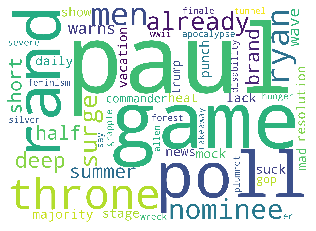

Топик # 1


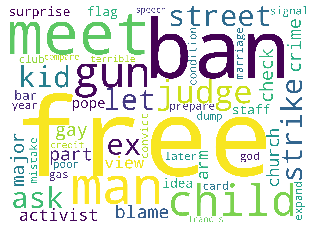

Топик # 2


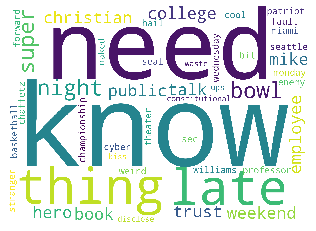

Топик # 3


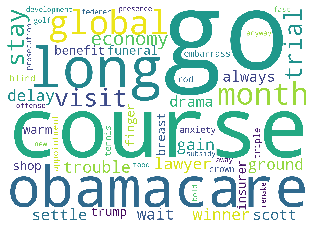

Топик # 4


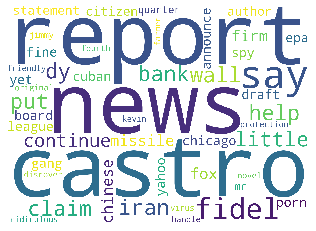

Топик # 5


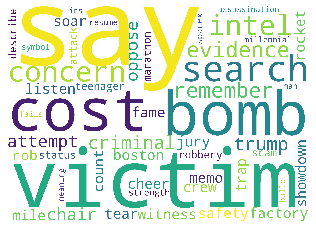

Топик # 6


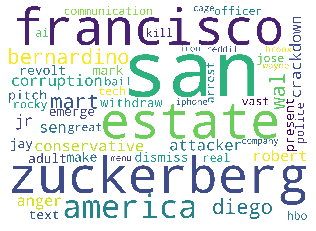

Топик # 7


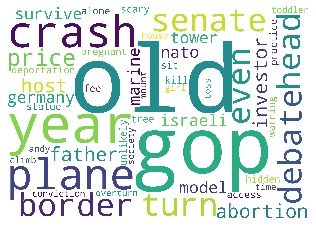

Топик # 8


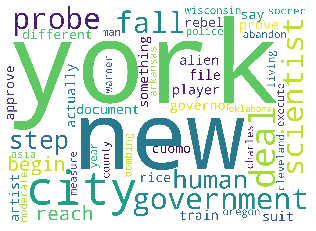

Топик # 9


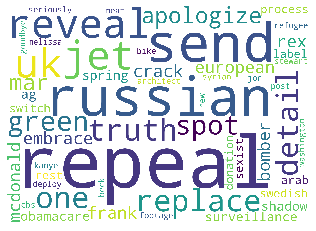

Топик # 10


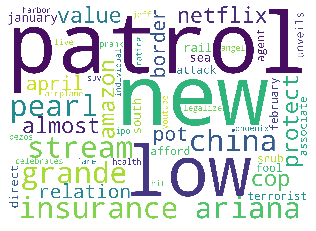

Топик # 11


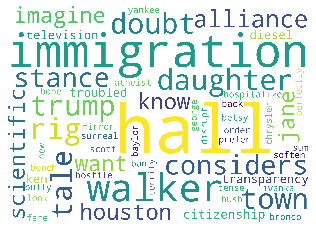

Топик # 12


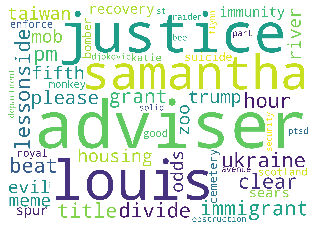

Топик # 13


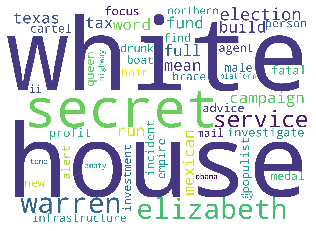

Топик # 14


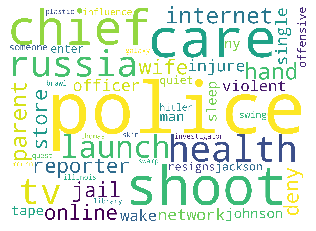

Топик # 15


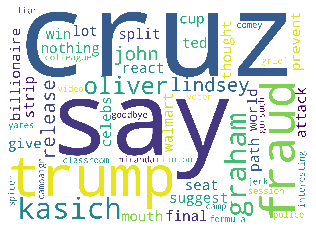

Топик # 16


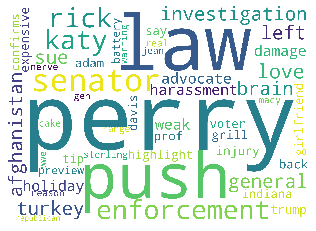

Топик # 17


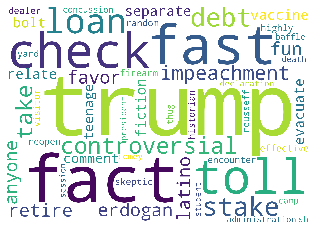

Топик # 18


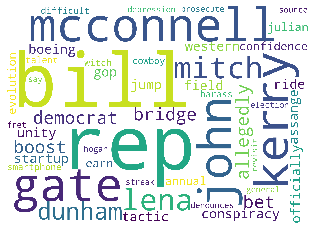

Топик # 19


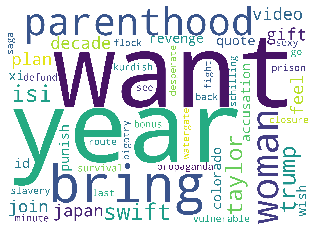

Топик # 20


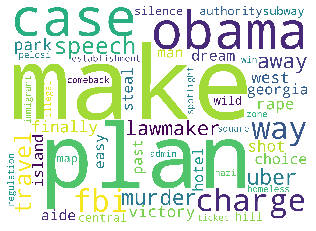

Топик # 21


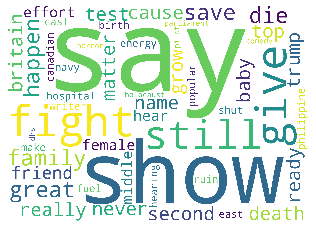

Топик # 22


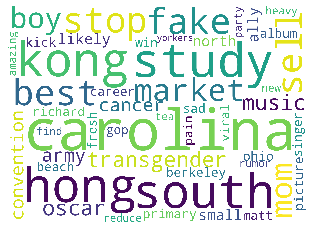

Топик # 23


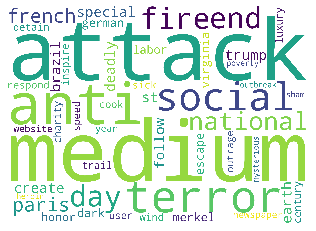

Топик # 24


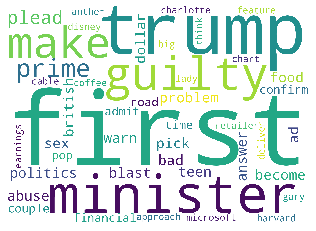

Топик # 25


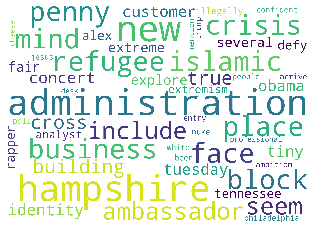

Топик # 26


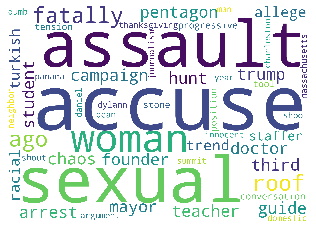

Топик # 27


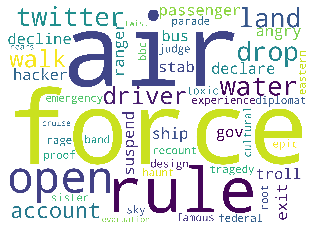

Топик # 28


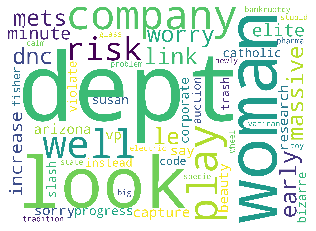

Топик # 29


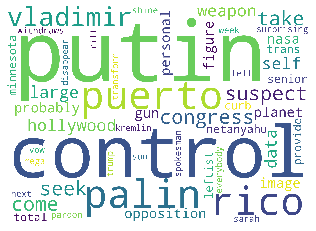

Топик # 30


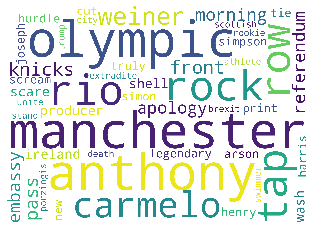

Топик # 31


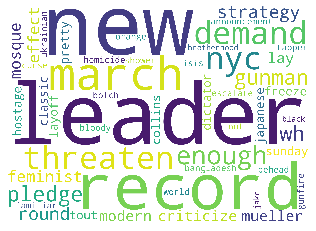

Топик # 32


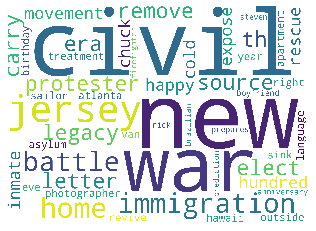

Топик # 33


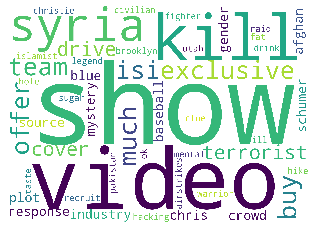

Топик # 34


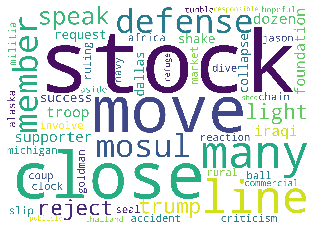

Топик # 35


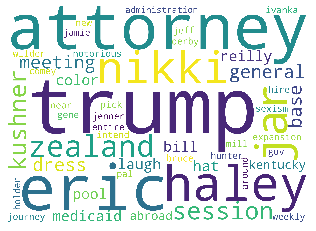

Топик # 36


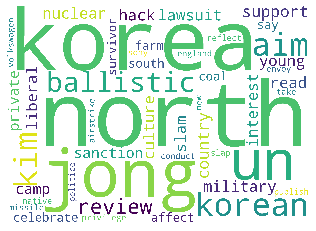

Топик # 37


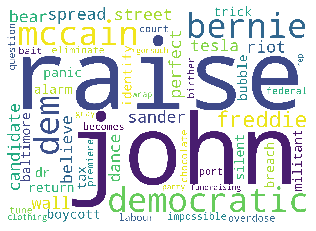

Топик # 38


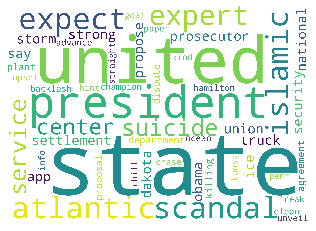

Топик # 39


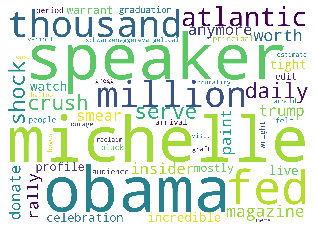

Топик # 40


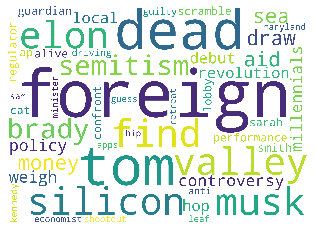

Топик # 41


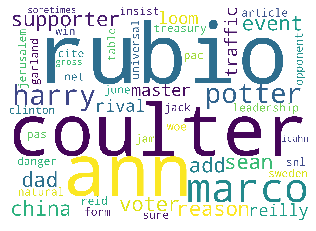

Топик # 42


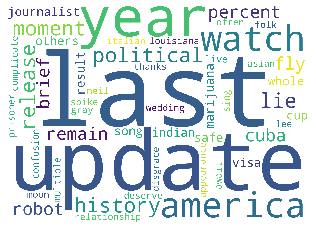

Топик # 43


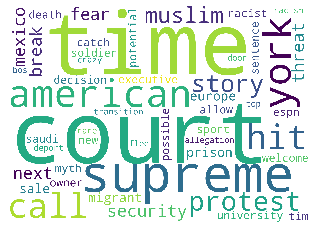

Топик # 44


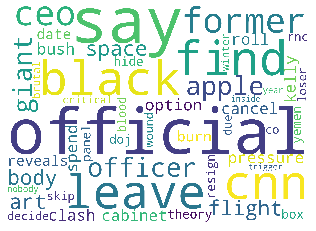

Топик # 45


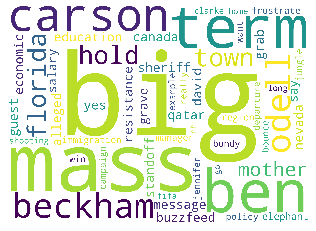

Топик # 46


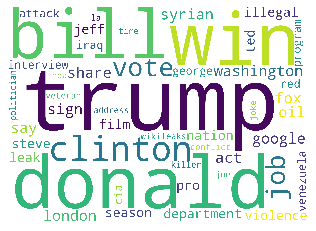

Топик # 47


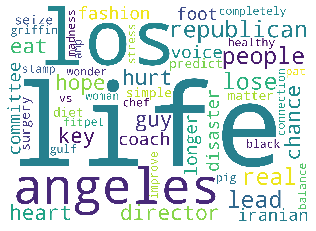

Топик # 48


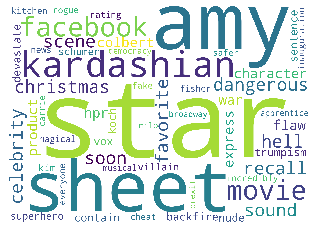

Топик # 49


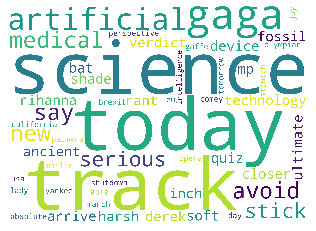

Топик # 50


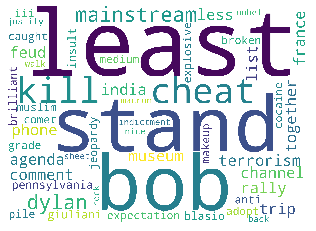

Топик # 51


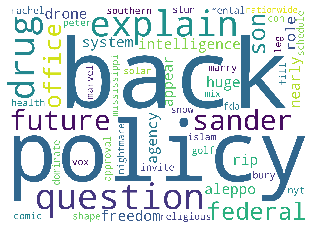

Топик # 52


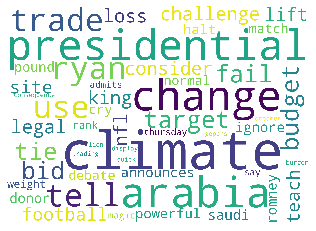

Топик # 53


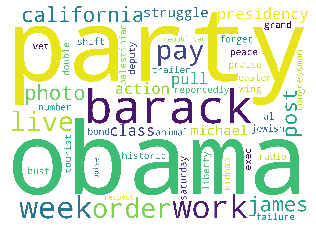

Топик # 54


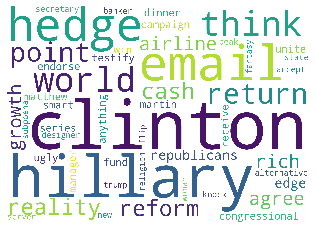

Топик # 55


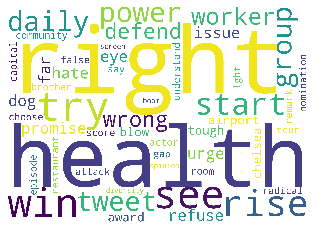

Топик # 56


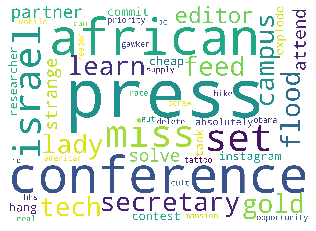

Топик # 57


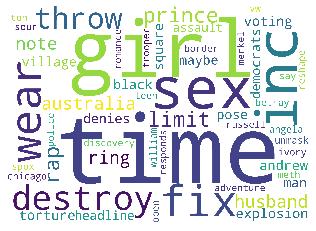

Топик # 58


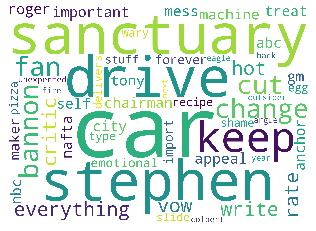

Топик # 59


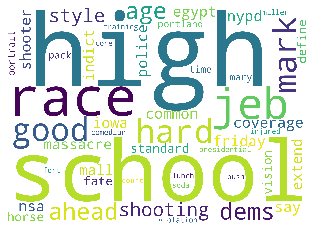

In [12]:
topics_v = []

for i in range(60):
    topics_v.append(model.components_[i])

topics_v_named = []
for j in range(60):
    topics_v_named.append([vec.get_feature_names()[i] for i in topics_v[j].argsort()[:-50 - 1 :-1]])
    
for j in range(60):
    print('Топик #', j)
    cloud0 = WordCloud(background_color='white', width=2500, height=1800).generate(" ".join(topics_v_named[j]))
    
    plt.imshow(cloud0)
    plt.axis('off')
    plt.show()

In [15]:
df['publication'].unique()

array(['NPR', 'Talking Points Memo', 'Fox News', 'National Review',
       'Guardian', 'Washington Post', 'CNN', 'Reuters', 'Breitbart',
       'New York Post', 'Vox', 'New York Times', 'Business Insider',
       'Buzzfeed News', 'Atlantic'], dtype=object)

In [23]:
df

title       date  \
105029  How Nirvana’s ’Smells Like Teen Spirit’ Became... 2000-05-15   
62169          Everything changes. Everything. Especially 2003-06-14   
108303  David Bowie On The Ziggy Stardust Years: ’We W... 2003-09-19   
57718                  Nancy Reagan’s Alzheimer’s Crusade 2004-06-06   
61403                                One final thought on 2004-11-18   
...                                                   ...        ...   
101207  The view from Middletown: For Bernie Sanders s...        NaT   
101950  Progress Personified: NYC subway hero takes hi...        NaT   
102369  Enter the Defining Moment contest for a chance...        NaT   
102987  The view from Middletown: join Gary Younge for...        NaT   
103448        The secret to happiness is all in your head        NaT   

                publication  \
105029                  NPR   
62169   Talking Points Memo   
108303                  NPR   
57718              Fox News   
61403   Talking Points Memo   
...                     ...   
101207             Guardian   
101950             Guardian   
102369             Guardian   
102987             Guardian   
103448             Guardian   

                                         normalized_title  n_topic  \
105029          nirvana s smell teen spirit become anthem       24   
62169             everything change everything especially       58   
108303  david bowie ziggy stardust year be create st c...       23   
57718                  nancy reagan s alzheimer s crusade       20   
61403                                       final thought       15   
...                                                   ...      ...   
101207  view middletown bernie sander supporters vote ...       37   
101950  progress personify nyc subway hero take good d...       35   
102369  enter define moment contest chance be feature ...       59   
102987  view middletown join gary younge unique look e...       24   
103448                           secret happiness be head        7   

        topic_proba  
105029     0.693261  
62169      0.571800  
108303     0.656838  
57718      0.642567  
61403      0.591230  
...             ...  
101207     0.198284  
101950     0.129309  
102369     0.115454  
102987     0.166541  
103448     0.300956  

[142568 rows x 6 columns]

In [24]:
import matplotlib.pyplot as plt

df[(df['publication'].isin(right)) & (df['n_topic'] == topic_number)].groupby(pd.Grouper(key='date', freq='M')).size().plot.bar(label='right', color = 'red')
(df[(df['publication'].isin(left)) & (df['n_topic'] == topic_number)].groupby(pd.Grouper(key='date', freq='M')).size().plot.bar(label='left')

plt.legend()

SyntaxError: invalid syntax (<ipython-input-24-f1fb09cffa55>, line 6)

In [63]:
topic_number = 29  # Выбираешь номер темы
left = ['CNN','New York Times','Washington Post','Guardian','Atlantic','Buzzfeed News','Vox']
right = ['Fox News','New York Post','Reuters','Breitbart','NRP','National Review']

topic_df = pd.concat([
    df[(df['publication'].isin(right)) & (df['n_topic'] == topic_number)].groupby(pd.Grouper(key='date', freq='M')).size().to_frame('n_right_news'),
    df[(df['publication'].isin(left)) & (df['n_topic'] == topic_number)].groupby(pd.Grouper(key='date', freq='M')).size().to_frame('n_left_news')], axis=1)
topic_df['diff'] = topic_df['n_right_news'] - topic_df['n_left_news']
topic_df.head()

n_right_news  n_left_news  diff
date                                       
2012-07-31           NaN            1   NaN
2012-08-31           NaN            0   NaN
2012-09-30           NaN            0   NaN
2012-10-31           NaN            0   NaN
2012-11-30           NaN            0   NaN

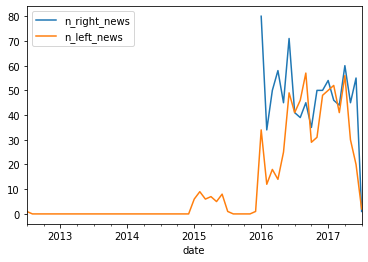

In [64]:
topic_df[['n_right_news','n_left_news']].plot()

